# **COVID-19 - DATA SCIENCE PROJECT**

<u style="font-weight:600 ; font-size: 18px ;">Objectif du projet :</u> À partir de l'ensemble de données à notre disposition, nous souhaitons mettre en place un modèle de Machine Learning capable de prédire si une personne est infectée ou pas.

<u style="font-weight:600; font-size: 18px;">Métriques :</u> Accuracy → 90%

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importation des données

In [2]:
df_original = pd.read_excel('./datasets/dataset.xlsx')
df_original.head()

Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0  44477f75e8169d2                    13               negative   
1  126e9dd13932f68                    17               negative   
2  a46b4402a0e5696                     8               negative   
3  f7d619a94f97c45                     5               negative   
4  d9e41465789c2b5                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   ...  \
0         NaN        NaN                    NaN  ...   
1    -0.02234  -0.517413               0.010677  ...   
2         NaN        NaN                    NaN  ...   
3         NaN        NaN                    NaN  ...   
4         NaN        NaN                    NaN  ...   

   Hb saturation (arterial blood gases)  pCO2 (arterial blood gas analysis)  \
0                                   NaN                                 NaN   
1                                   NaN                                 NaN   
2                                   NaN                                 NaN   
3                                   NaN                                 NaN   
4                                   NaN                                 NaN   

   Base excess (arterial blood gas analysis)  \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4                                        NaN   

   pH (arterial blood gas analysis)  Total CO2 (arterial blood gas analysis)  \
0                               NaN                                      NaN   
1                               NaN                                      NaN   
2                               NaN                                      NaN   
3                               NaN                                      NaN   
4                               NaN                                      NaN   

   HCO3 (arterial blood gas analysis)  pO2 (arterial blood gas analysis)  \
0                                 NaN                                NaN   
1                                 NaN                                NaN   
2                                 NaN                                NaN   
3                                 NaN                                NaN   
4                                 NaN                                NaN   

   Arteiral Fio2  Phosphor  ctO2 (arterial blood gas analysis)  
0            NaN       NaN                                 NaN  
1            NaN       NaN                                 NaN  
2            NaN       NaN                                 NaN  
3            NaN       NaN                                 NaN  
4            NaN       NaN                                 NaN  

[5 rows x 111 columns]

Au premier coup d'œil du dataset, on remarque que :
- Le nom de chaque colonne est sous un mauvais format
- Certaines colonnes semblent ne contenir que des valeurs manquantes NaN
- La colonne target est 'SARS-Cov-2 exam result'

## Exploratory Data Analysis (EDA)

In [3]:
df = df_original.copy()
df.head()

Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0  44477f75e8169d2                    13               negative   
1  126e9dd13932f68                    17               negative   
2  a46b4402a0e5696                     8               negative   
3  f7d619a94f97c45                     5               negative   
4  d9e41465789c2b5                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   ...  \
0         NaN        NaN                    NaN  ...   
1    -0.02234  -0.517413               0.010677  ...   
2         NaN        NaN                    NaN  ...   
3         NaN        NaN                    NaN  ...   
4         NaN        NaN                    NaN  ...   

   Hb saturation (arterial blood gases)  pCO2 (arterial blood gas analysis)  \
0                                   NaN                                 NaN   
1                                   NaN                                 NaN   
2                                   NaN                                 NaN   
3                                   NaN                                 NaN   
4                                   NaN                                 NaN   

   Base excess (arterial blood gas analysis)  \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4                                        NaN   

   pH (arterial blood gas analysis)  Total CO2 (arterial blood gas analysis)  \
0                               NaN                                      NaN   
1                               NaN                                      NaN   
2                               NaN                                      NaN   
3                               NaN                                      NaN   
4                               NaN                                      NaN   

   HCO3 (arterial blood gas analysis)  pO2 (arterial blood gas analysis)  \
0                                 NaN                                NaN   
1                                 NaN                                NaN   
2                                 NaN                                NaN   
3                                 NaN                                NaN   
4                                 NaN                                NaN   

   Arteiral Fio2  Phosphor  ctO2 (arterial blood gas analysis)  
0            NaN       NaN                                 NaN  
1            NaN       NaN                                 NaN  
2            NaN       NaN                                 NaN  
3            NaN       NaN                                 NaN  
4            NaN       NaN                                 NaN  

[5 rows x 111 columns]

- ### Dimensions du dataset

In [4]:
print(f"Nombre de colonnes : {df.shape[1]}\nNombre de lignes : {df.shape[0]}")

Nombre de colonnes : 111
Nombre de lignes : 5644


**Remarque :** Nous avons un grand nombre de variables, il faudra donc réduire la dimensionnalité

- ### Formatage du nom des colonnes

In [5]:
def format_col_name(col_name_ : str) -> str:
    """
    Formats a column name by converting it to lowercase, replacing spaces with underscores,
    and trimming unnecessary whitespace. If the input contains a parenthesis, the function
    only processes the substring before the parenthesis.

    :param col_name_: The name of the column to be formatted.
    :return: The formatted column name with spaces replaced by underscores and converted
        to lowercase.
    """
    if col_name_.find('(') == -1:
        return col_name_.strip(' ').replace(' ', '_').lower()
    return col_name_[ :col_name_.find('(')].strip(' ').replace(' ', '_').lower()

In [6]:
df.rename(columns={col : format_col_name(col) for col in df.columns}, inplace=True)

In [7]:
df.columns

Index(['patient_id', 'patient_age_quantile', 'sars-cov-2_exam_result',
       'patient_addmited_to_regular_ward',
       'patient_addmited_to_semi-intensive_unit',
       'patient_addmited_to_intensive_care_unit', 'hematocrit', 'hemoglobin',
       'platelets', 'mean_platelet_volume',
       ...
       'hb_saturation', 'pco2', 'base_excess', 'ph', 'total_co2', 'hco3',
       'po2', 'arteiral_fio2', 'phosphor', 'cto2'],
      dtype='object', length=111)

- ### Types de variables

<Axes: ylabel='count'>

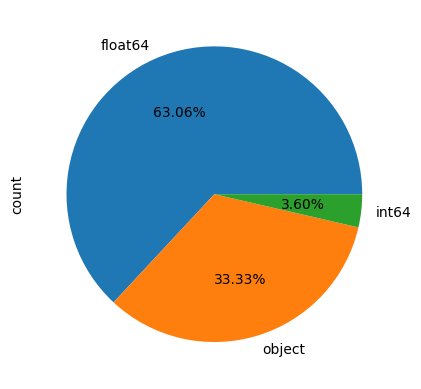

In [8]:
df.dtypes.value_counts().plot.pie(autopct='%.2f%%')

In [9]:
pd.set_option('display.max_rows', None)
df.dtypes

patient_id                                     object
patient_age_quantile                            int64
sars-cov-2_exam_result                         object
patient_addmited_to_regular_ward                int64
patient_addmited_to_semi-intensive_unit         int64
patient_addmited_to_intensive_care_unit         int64
hematocrit                                    float64
hemoglobin                                    float64
platelets                                     float64
mean_platelet_volume                          float64
red_blood_cells                               float64
lymphocytes                                   float64
mean_corpuscular_hemoglobin_concentration     float64
leukocytes                                    float64
basophils                                     float64
mean_corpuscular_hemoglobin                   float64
eosinophils                                   float64
mean_corpuscular_volume                       float64
monocytes                   

- ###  Valeurs manquantes NaN

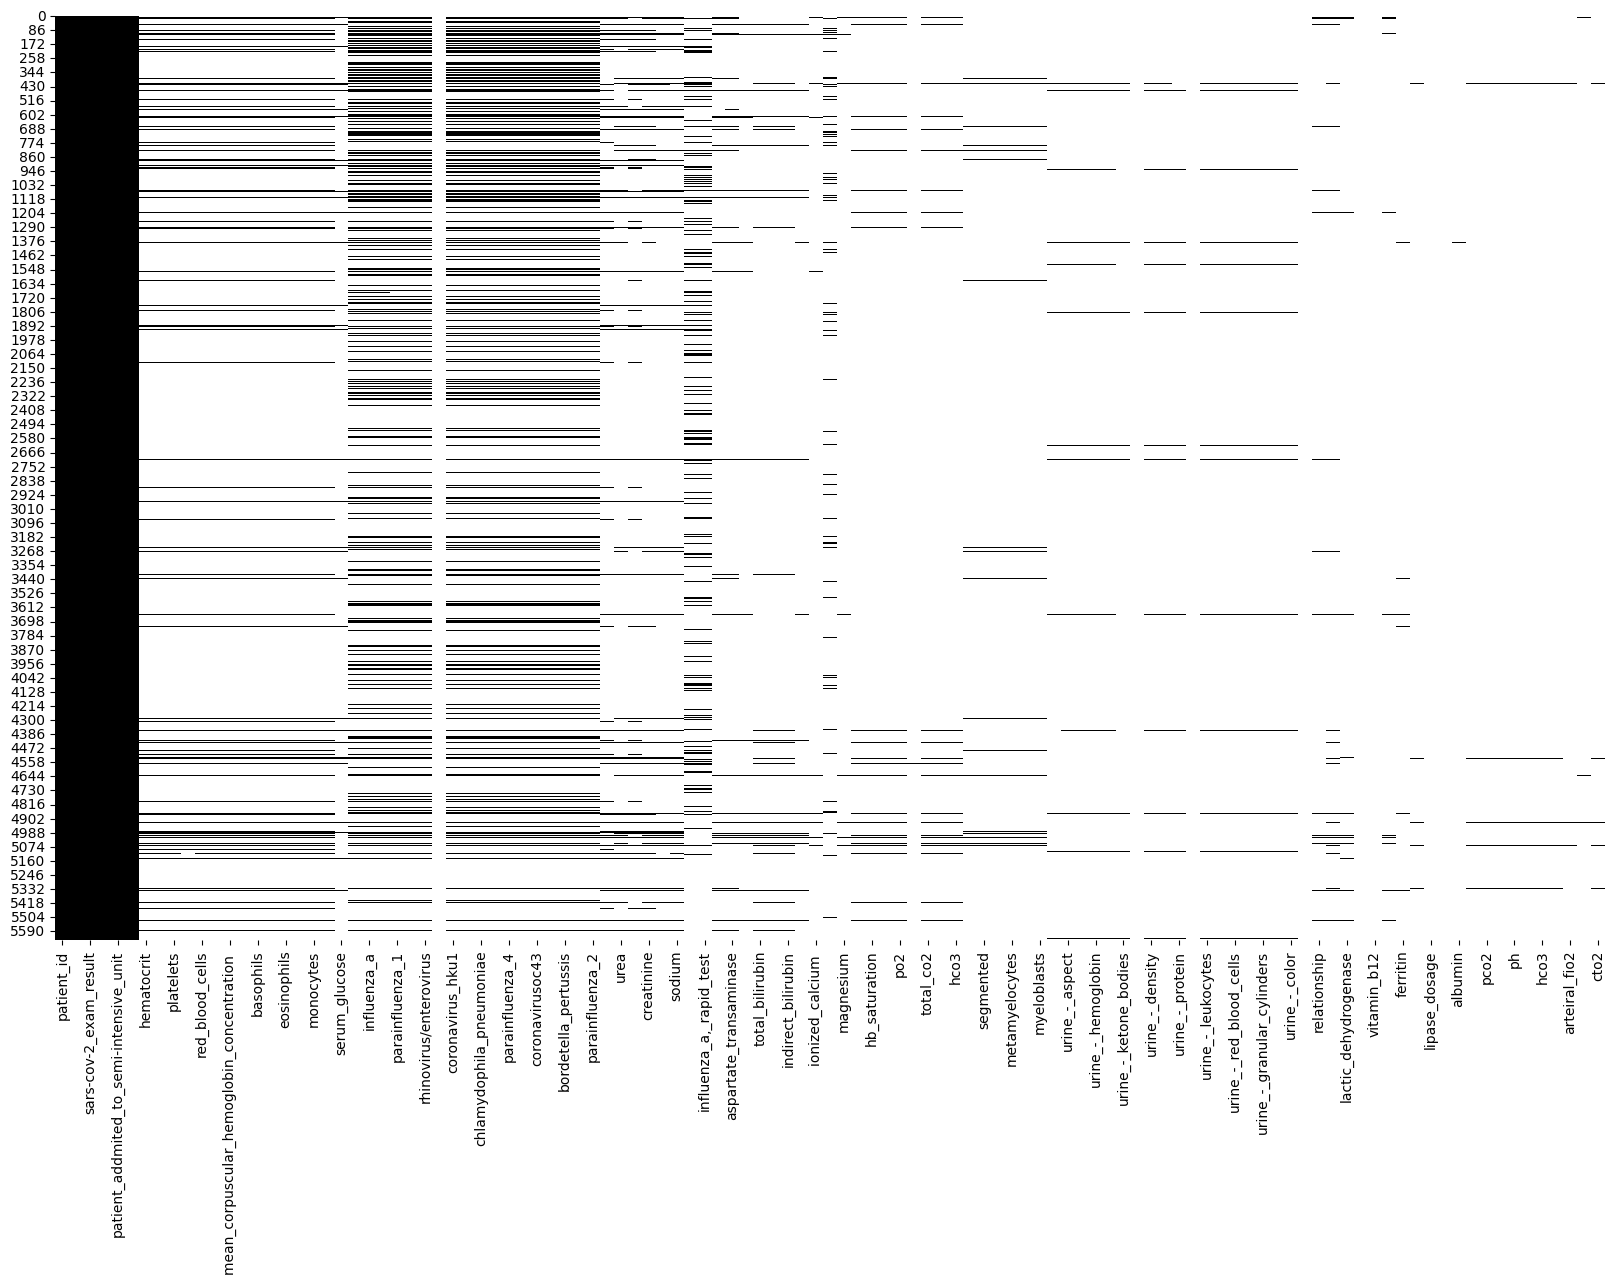

In [10]:
plt.figure(figsize=(20, 12))
sns.heatmap(df.isna(), cbar=False, cmap='gray')
plt.show()

In [11]:
columns_NaN = (df.isnull().sum() * 100 / df.shape[0]).round(2).sort_values()
columns_NaN

patient_id                                      0.00
patient_age_quantile                            0.00
sars-cov-2_exam_result                          0.00
patient_addmited_to_regular_ward                0.00
patient_addmited_to_semi-intensive_unit         0.00
patient_addmited_to_intensive_care_unit         0.00
influenza_b                                    76.01
influenza_a                                    76.01
respiratory_syncytial_virus                    76.01
parainfluenza_1                                76.05
rhinovirus/enterovirus                         76.05
coronavirus_hku1                               76.05
chlamydophila_pneumoniae                       76.05
coronavirusnl63                                76.05
parainfluenza_3                                76.05
adenovirus                                     76.05
inf_a_h1n1_2009                                76.05
parainfluenza_2                                76.05
metapneumovirus                               

**Remarque :**
1. Une bonne partie des colonnes/variables ont plus de 90% de valeurs manquantes ; Du coup, on va les supprimer dans un premier temps, parce qu'à ce stade, on ne peut rien de plus pour récupérer ce trop-plein de valeurs manquantes.
2. Certains groupes de variables ont des valeurs manquantes pour les mêmes lignes ; Cela laisse penser que ces variables ont un lien entre elles.

- **Groupe A de variables avec 76% de NaN:** influenza_b, influenza_a, respiratory_syncytial_virus, parainfluenza_1, rhinovirus/enterovirus, coronavirus_hku1, chlamydophila_pneumoniae, coronavirusnl63, parainfluenza_3, adenovirus, inf_a_h1n1_2009, parainfluenza_2, metapneumovirus, bordetella_pertussis, coronavirus229e, coronavirusoc43, parainfluenza_4

- **Groupe B de variables avec 85% de NaN:** influenza_a,_rapid_test, influenza_b,_rapid_test

- **Groupe C de variables avec 89% de NaN:** hemoglobin, hematocrit, leukocytes, mean_corpuscular_hemoglobin_concentration, lymphocytes, red_blood_cells, basophils, platelets, eosinophils, mean_corpuscular_hemoglobin, red_blood_cell_distribution_width, mean_corpuscular_volume, monocytes, mean_platelet_volume

<table>
    <tr>
        <th style="text-align:left;">Groupe</th>
        <th style="text-align:left;">Signification</th>
        <th style="text-align:left;">Nom du groupe</th>
    </tr>
    <tr>
        <td style="text-align:left; width: 100px;">Groupe A</td>
        <td style="text-align:left;">Virus et bactéries responsables d'infections respiratoires aiguës</td>
        <td style="text-align:left;">respiratory_pathogens</td>
    </tr>
    <tr>
        <td style="text-align:left; width: 100px;">Groupe B</td>
        <td style="text-align:left;">Résultats de tests rapides (antigéniques) permettant de détecter la présence des virus de la grippe A ou de la grippe B dans un prélèvement respiratoire (comme un prélèvement nasal ou nasopharyngé).</td>
        <td style="text-align:left;">influenza_tests</td>
    </tr>
    <tr>
        <td style="text-align:left; width: 100px;">Groupe C</td>
        <td style="text-align:left;">Paramètres d’un hémogramme complet (ou numération formule sanguine, NFS), un examen sanguin de routine qui évalue les cellules du sang.</td>
        <td style="text-align:left;">blood_cells</td>
    </tr>
</table>

**En savoir plus...**

* Virus respiratoires courants<br>
`influenza_a, influenza_b, inf_a_h1n1_2009` : virus de la grippe, dont la souche pandémique H1N1 de 2009.<br>
`respiratory_syncytial_virus (RSV)` : principal virus des bronchiolites chez le nourrisson. <br>
`rhinovirus/enterovirus` : causes fréquentes du rhume banal, mais aussi de bronchiolites et exacerbations d’asthme. <br>
`coronavirus_hku1, coronavirusnl63, coronavirus229e, coronavirusoc43` : coronavirus saisonniers (non liés au SARS-CoV-2), responsables de rhumes. <br>
`parainfluenza_1, parainfluenza_2, parainfluenza_3, parainfluenza_4` : virus associés à la croup (laryngite), bronchites et bronchiolites. <br>
`metapneumovirus` : proche du VRS, cause des infections respiratoires chez les jeunes enfants et les personnes âgées. <br>
`adenovirus` : peut provoquer des infections respiratoires, oculaires ou digestives, parfois sévères. <br>

* Bactéries respiratoires<br>
`chlamydophila_pneumoniae (anciennement Chlamydia pneumoniae)` : bactérie pouvant causer des pneumonies ou bronchites atypiques. <br>
`bordetella_pertussis` : agent de la coqueluche (toux convulsive), surtout chez l’enfant, mais aussi chez l’adulte.<br>

* Globules rouges (érythrocytes) et transport de l’oxygène<br>
`hemoglobin (Hb)` : Protéine transportant l’oxygène dans les globules rouges.<br>
`hematocrit (Hct)` : Proportion de sang occupée par les globules rouges (%).<br>
`red_blood_cells (RBC)` : Nombre de globules rouges par volume de sang.<br>
`mean_corpuscular_volume (MCV)` : Volume moyen d’un globule rouge (microcytaire, normocytaire, macrocytaire).<br>
`mean_corpuscular_hemoglobin (MCH)` : Quantité moyenne d’hémoglobine par globule rouge.<br>
`mean_corpuscular_hemoglobin_concentration (MCHC)` : Concentration moyenne d’hémoglobine dans les globules rouges.<br>
`red_blood_cell_distribution_width (RDW)` : Variation de la taille des globules rouges (hétérogénéité).<br>

* Globules blancs (leucocytes) et système immunitaire<br>
`leukocytes (WBC)` : Nombre total de globules blancs (défense contre les infections).<br>
`lymphocytes, monocytes, eosinophils, basophils` : Sous-types de globules blancs, chacun impliqué dans des réponses immunitaires spécifiques (virus, allergies, parasites, inflammation).<br>

* Plaquettes (thrombocytes) et coagulation<br>
`platelets` : Nombre de plaquettes, essentielles pour la coagulation sanguine.<br>
`mean_platelet_volume (MPV)` : Taille moyenne des plaquettes, indicateur de leur activité ou production.<br>

In [12]:
# Suppression des features inutiles
df = df.drop(columns='patient_id')
df = df.drop(columns=[col for col, val in zip(columns_NaN.index, columns_NaN.values) if val > 90])

In [13]:
# Création des groupes de variables
missing_columns_a = (df.isnull().sum() * 100 / df.shape[0]).round(0) == 76
missing_columns_b = (df.isnull().sum() * 100 / df.shape[0]).round(0) == 85
missing_columns_c = (df.isnull().sum() * 100 / df.shape[0]).round(0) == 89

respiratory_pathogens = df.columns[missing_columns_a]
influenza_tests = df.columns[missing_columns_b]
blood_cells = df.columns[missing_columns_c]

- ### Visualisation des features

Variable `patient_age_quantile`

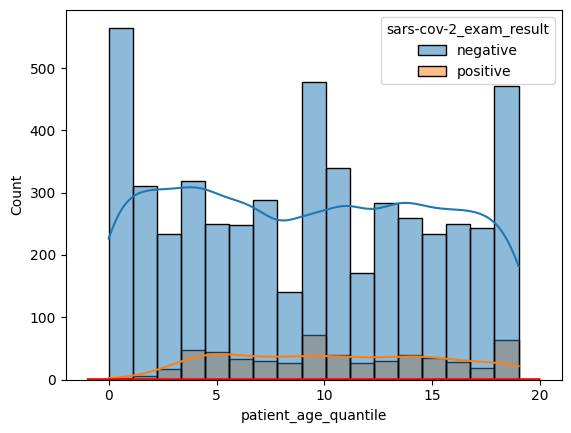

In [14]:
from scipy.stats import norm

sns.histplot(df, x="patient_age_quantile", hue="sars-cov-2_exam_result", kde=True)

# Courbe de la distribution normale de cette feature
mu, std = norm.fit(df["patient_age_quantile"])
x_min, x_max = plt.xlim()
x_kde = np.linspace(x_min, x_max, df["patient_age_quantile"].count())
p = norm.pdf(x_kde, mu, std)

plt.plot(x_kde, p, linewidth=2, color="red")

plt.show()

1. Variable difficile à interpreter, car manque d'infos sur l'échelle réelle des âges.
2. Pas de distribution normale ou de forme particulière ici.

Variables continues

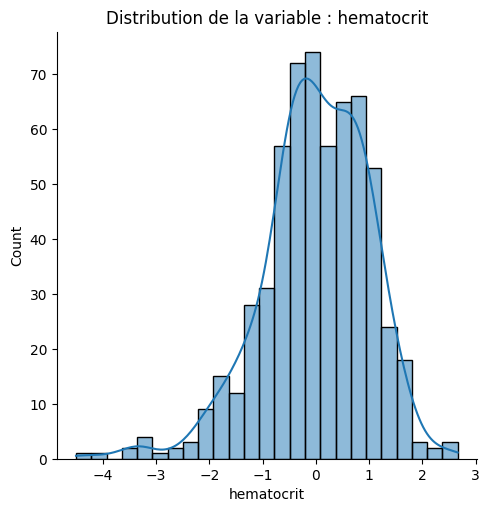

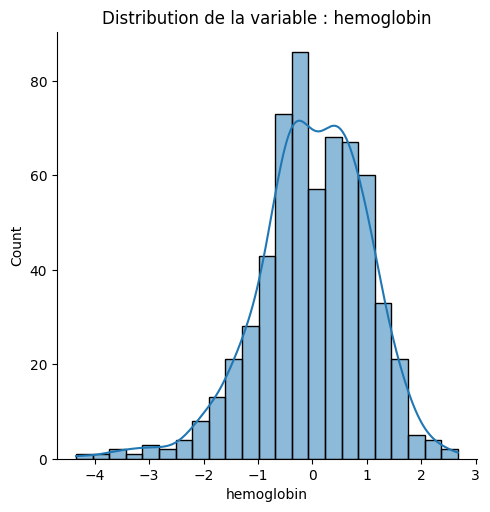

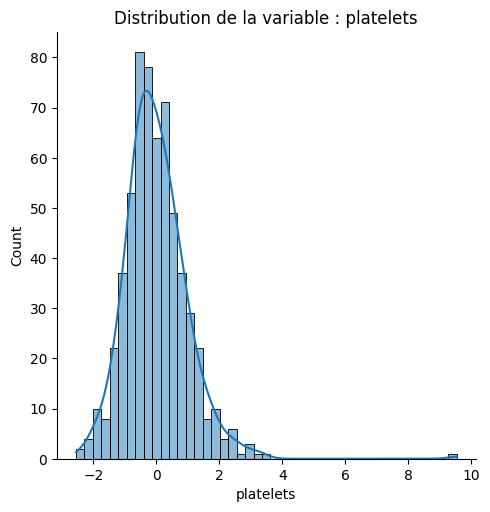

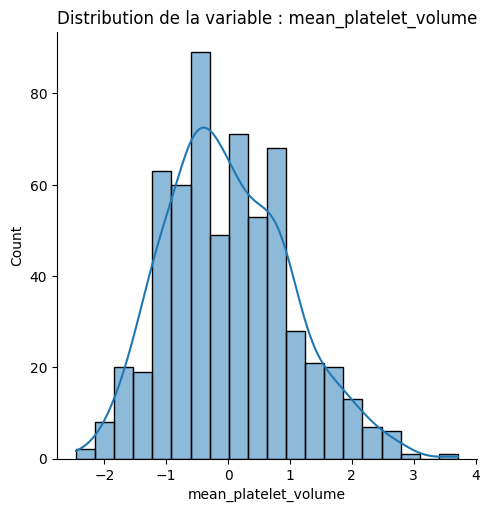

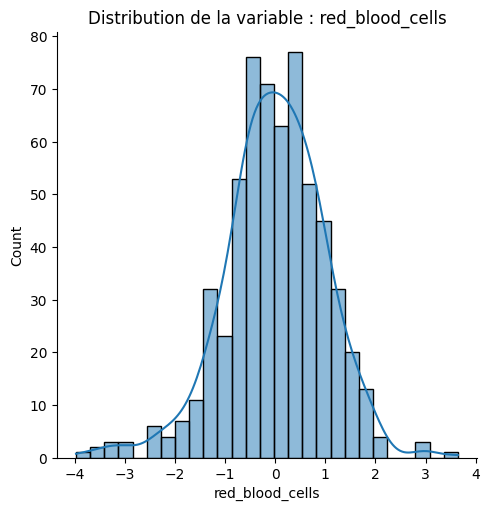

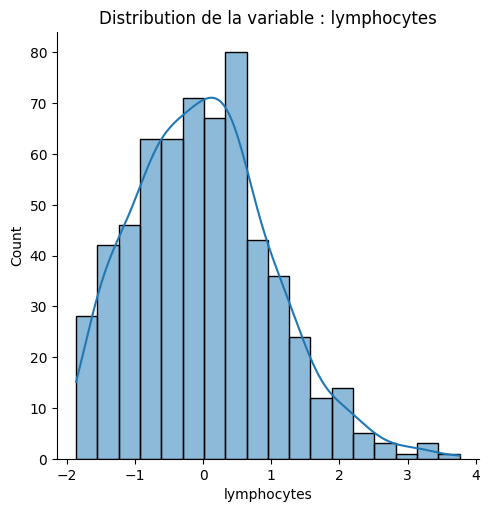

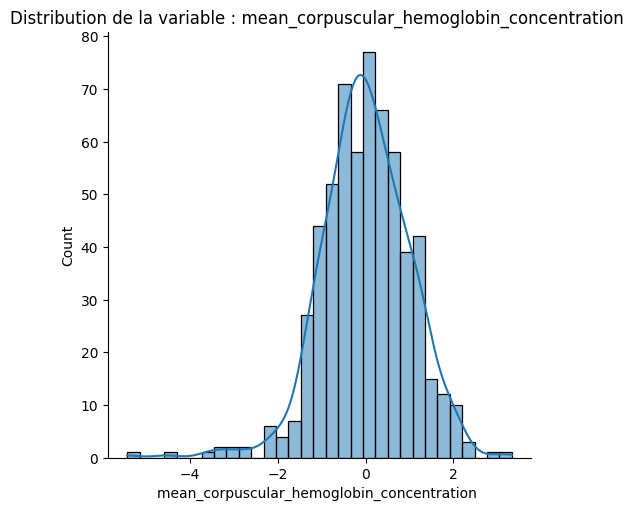

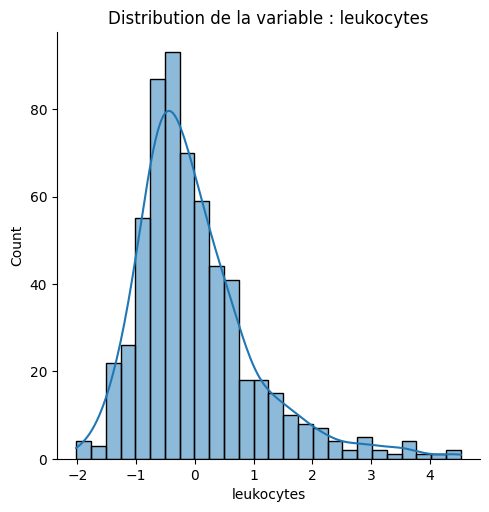

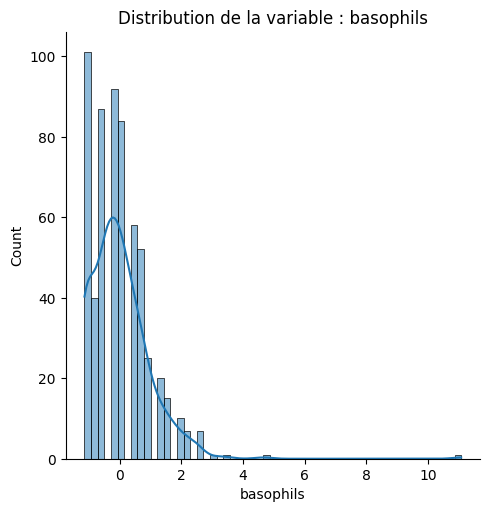

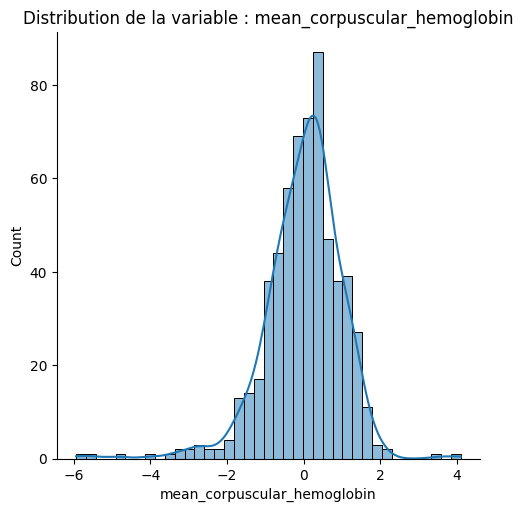

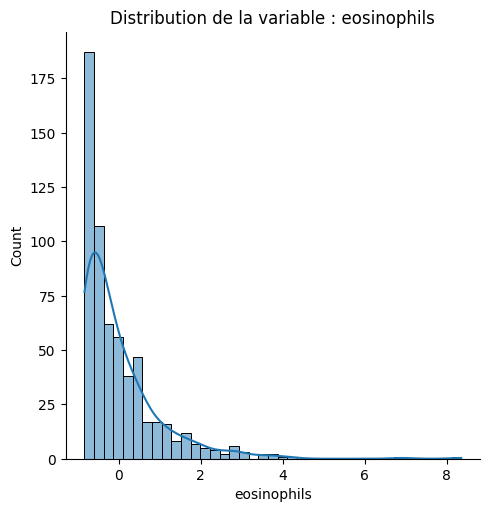

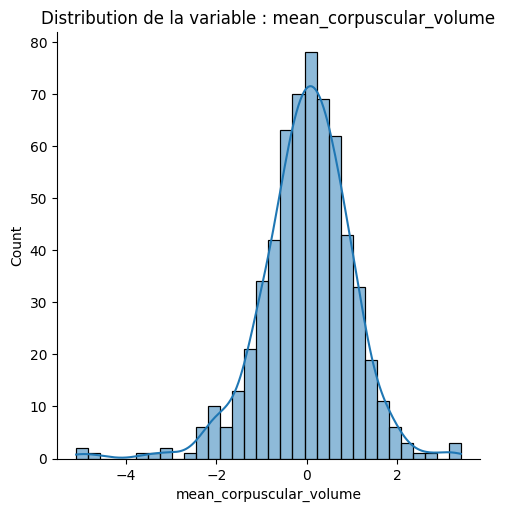

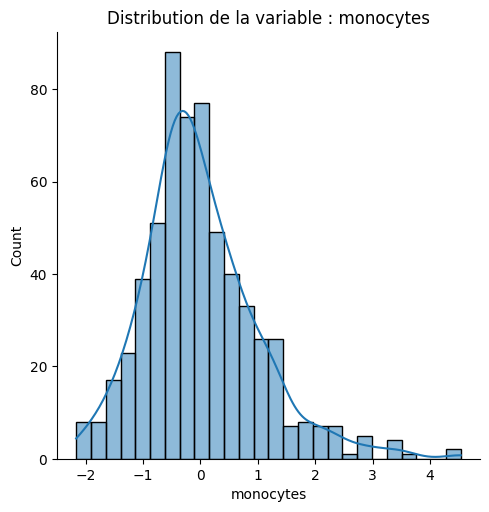

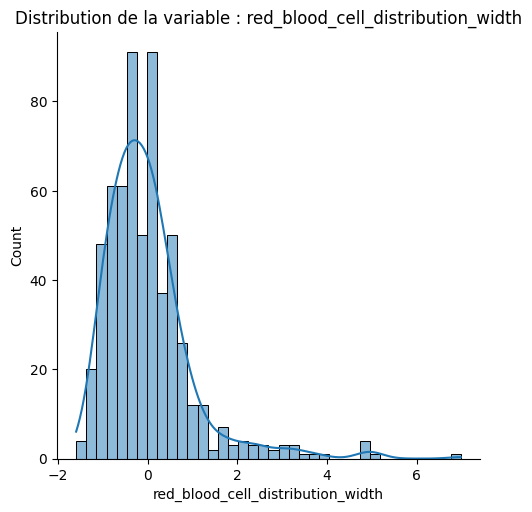

In [15]:
for col in df.select_dtypes(include='float'):
    sns.displot(df[col], kde=True)
    plt.title(f"Distribution de la variable : {col}")
    plt.show()

**Remarque :**
1. La plupart de ces variables semblent avoir été standardisées vu qu'elles sont centrés en 0 et ont à peu près un `std` égale à 1.
2. Certaines suivent une distribution normale et d'autres sont plutôt asymétriques (skewness).

On peut ici réaliser des tests de normalité, mieux Standardiser ces données et calculer

Variables booléennes (0 ou 1)

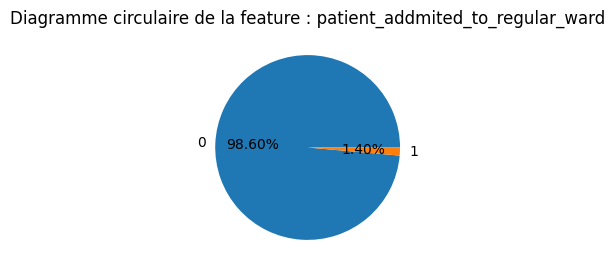

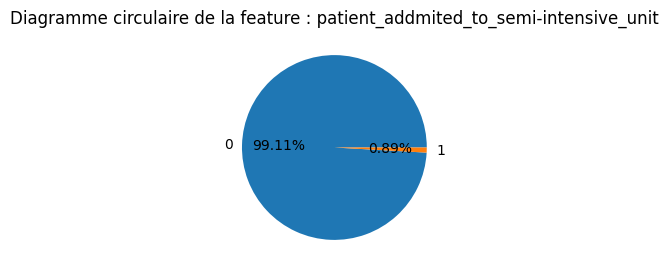

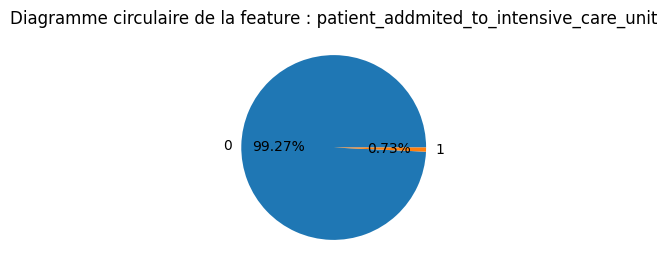

In [16]:
columns = [
    "patient_addmited_to_regular_ward",
    "patient_addmited_to_semi-intensive_unit",
    "patient_addmited_to_intensive_care_unit"
]
for col in columns:
    feature_grouped = df.groupby(col)[col].count()

    plt.figure(figsize=(3, 3))
    plt.title(f"Diagramme circulaire de la feature : {col}")
    plt.pie(x=feature_grouped.values, labels=feature_grouped.index, autopct="%.2f%%")
    plt.show()

Aucune information vraiment utile mis à part le fort taux de valeur `positive ou 1`

- ### Variables catégorielles

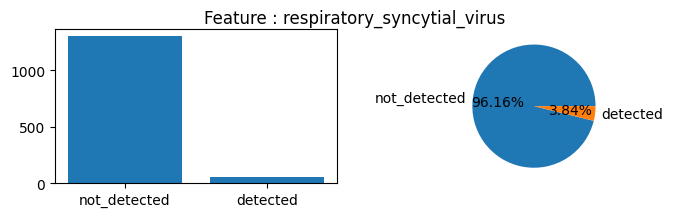

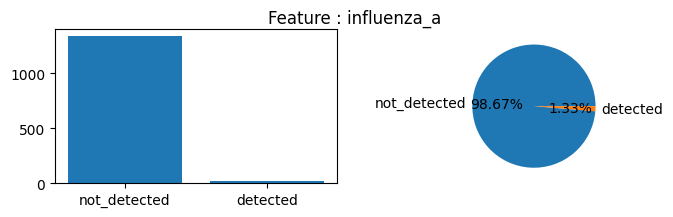

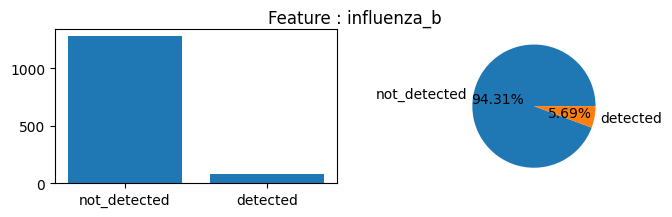

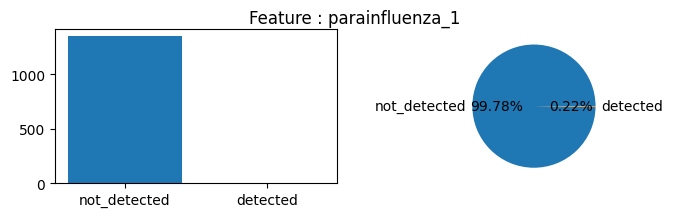

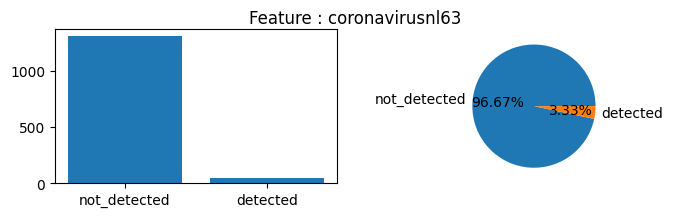

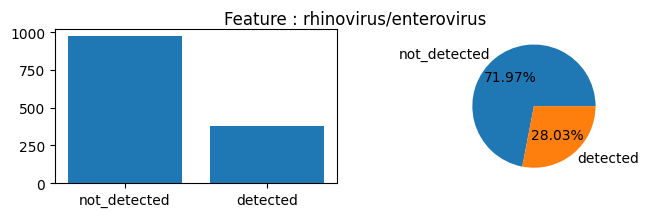

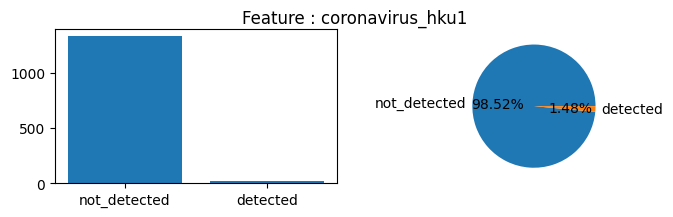

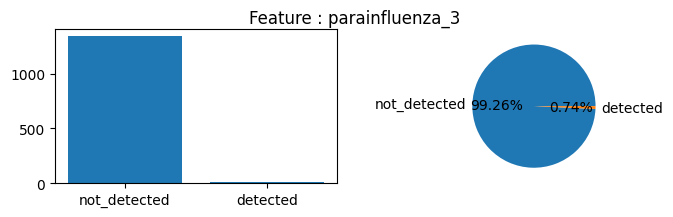

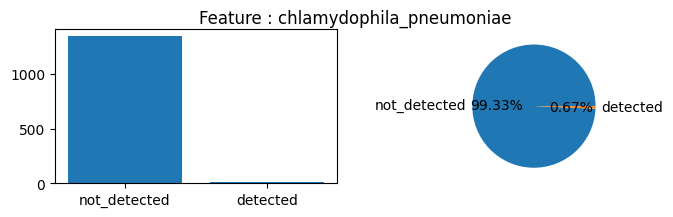

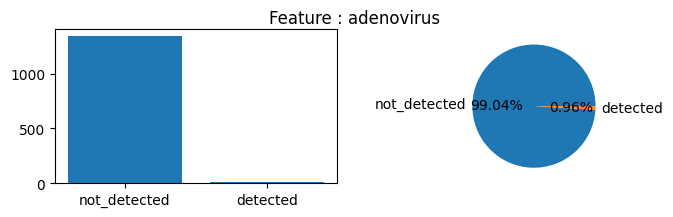

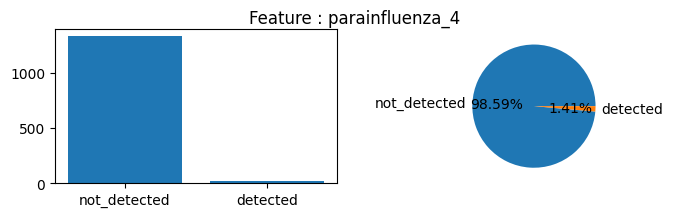

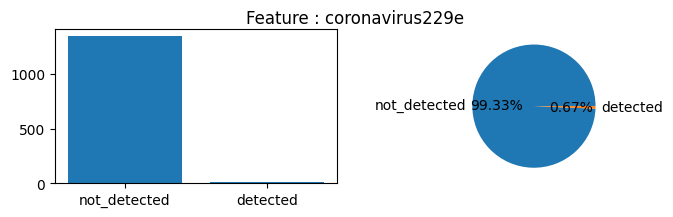

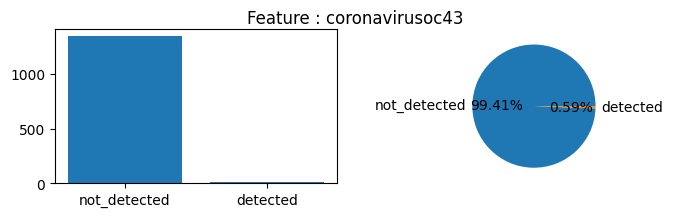

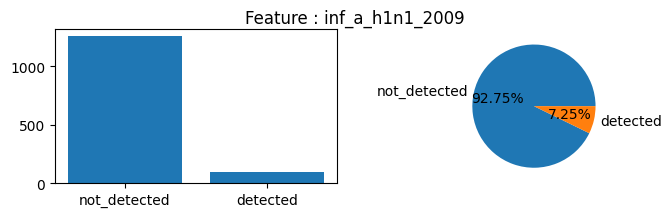

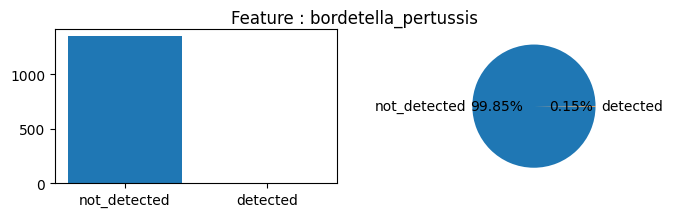

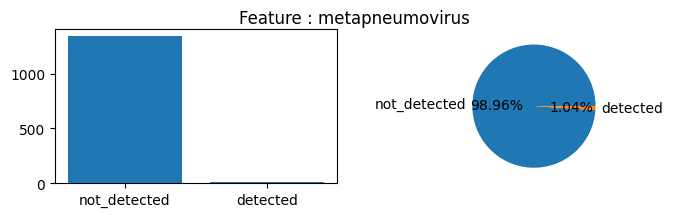

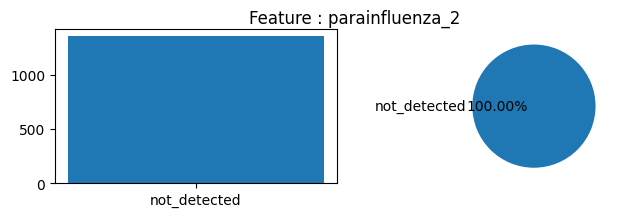

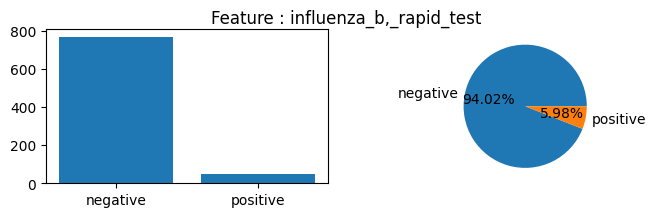

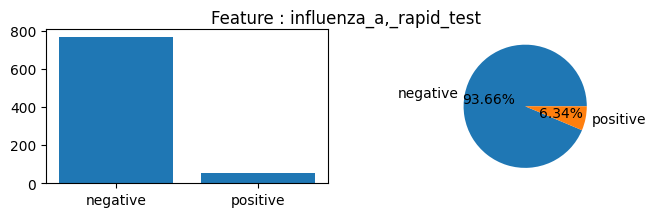

In [17]:
for col in df.select_dtypes(include='object'):
    if col == 'sars-cov-2_exam_result': continue

    feature_table = df[col].value_counts()
    fig, ax = plt.subplots(1, 2, figsize=(8, 2))
    fig.suptitle(f"Feature : {col}")
    ax[0].bar(x=feature_table.index, height=feature_table.values)
    ax[1].pie(feature_table, labels=feature_table.index, autopct="%.2f%%")
    plt.show()

1. Contrairement à la majorité des variables qui ont plus de 90% de valeur `not_detected`, `rhinovirus/enterovirus` à une plus bonne proportion de valeur `detected`.
2. La variable `parainfluenza_2` n'a qu'une seule valeur `not_detected` donc nous pouvons la supprimer.

In [18]:
# Suppression de parainfluenza_2
df.drop(columns="parainfluenza_2", inplace=True)

- ### Visualisation de la target

<BarContainer object of 2 artists>

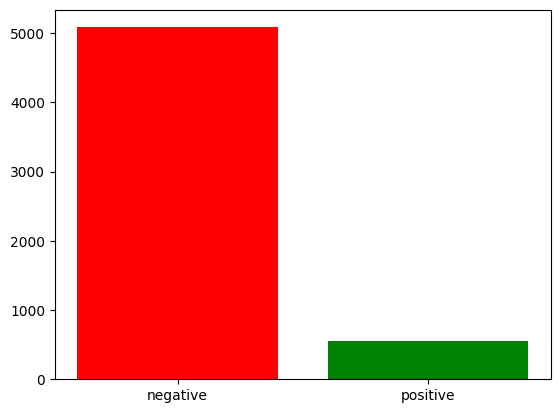

In [19]:
target = "sars-cov-2_exam_result"
target_table = df[target].value_counts()
plt.bar(x=target_table.index, height=target_table.values, color=['red', 'green'])

**Remarque :** La répartition des résultats est déséquilibrée
1. On utilisera une métrique propre pour évaluer notre modèle dans ce genre de situation.
2. On utilisera également une méthode adaptée pour la division du datasets, train et test set, pour qu'elle ne soit pas déséquilibrée.

- ### Identification des Outliers

/tmp/ipykernel_143506/414008455.py:2: UserWarning: 
The palette list has fewer values (12) than needed (14) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(df.select_dtypes(include='float'), palette=sns.color_palette("Paired"))


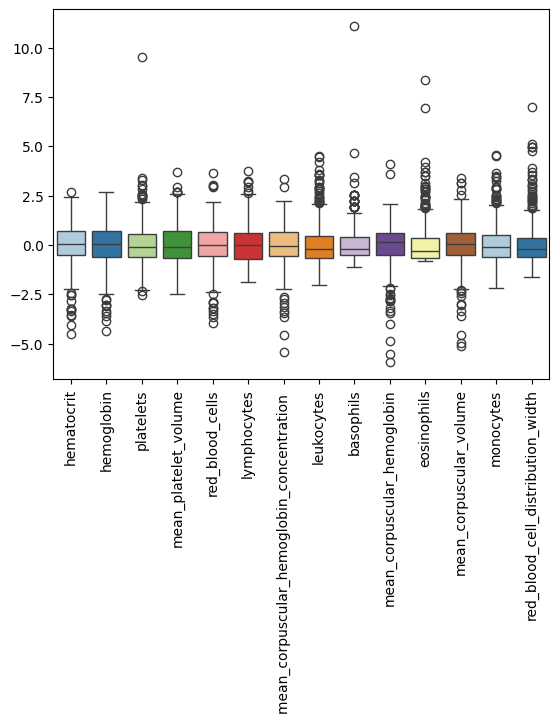

In [20]:
plt.xticks(rotation=90)
sns.boxplot(df.select_dtypes(include='float'), palette=sns.color_palette("Paired"))
plt.show()

La distribution de ces variables est centrée en 0, mais présente beaucoup d'Outliers.

- ### Relations entre Target et Features

On le fera en plusieurs étapes :

<label><input type="checkbox" checked> respiratory_pathogens / target</label><br>
<label><input type="checkbox" checked> influenza_tests / target</label><br>
<label><input type="checkbox" checked> blood_cells / target</label><br>
<label><input type="checkbox" checked> patient_age_quantile / target</label><br>
<label><input type="checkbox" checked> patient_addmited (3 variables) / target</label><br>

1. respiratory_pathogens / target

In [21]:
respiratory_pathogens = respiratory_pathogens.drop(labels='parainfluenza_2')

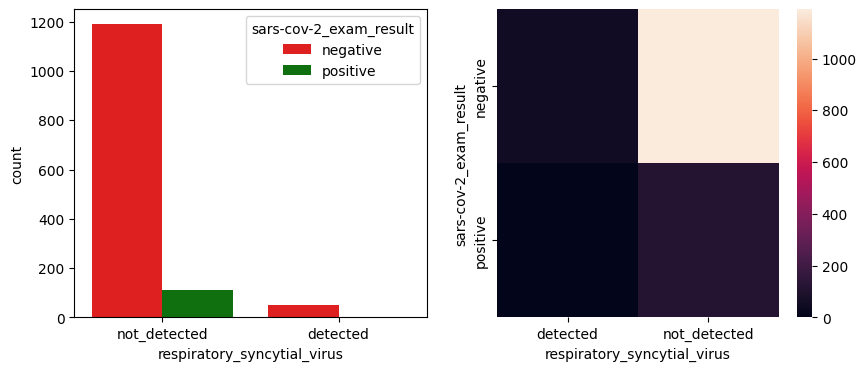

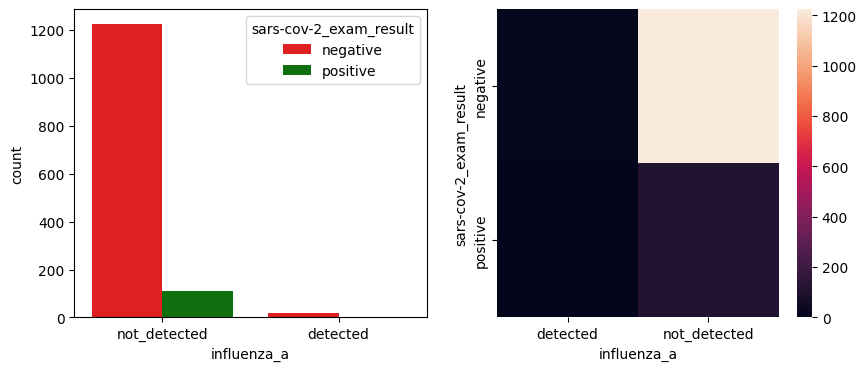

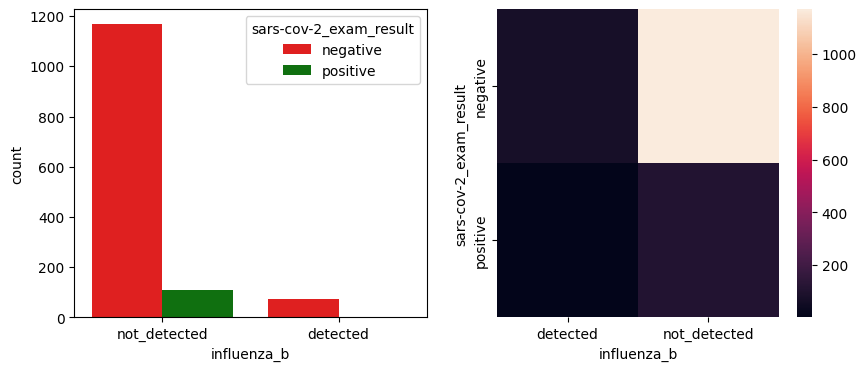

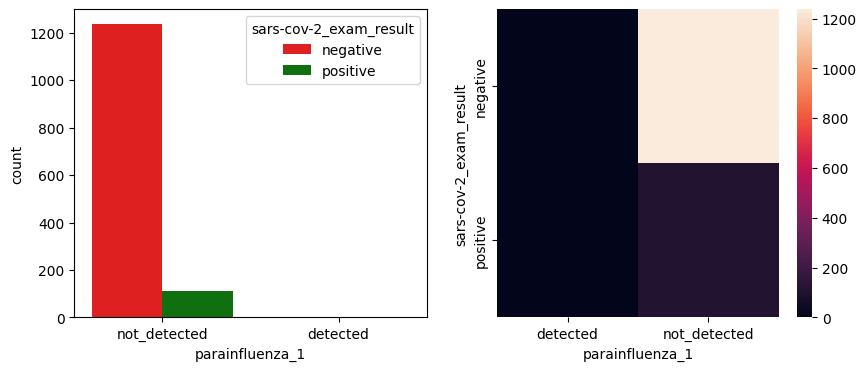

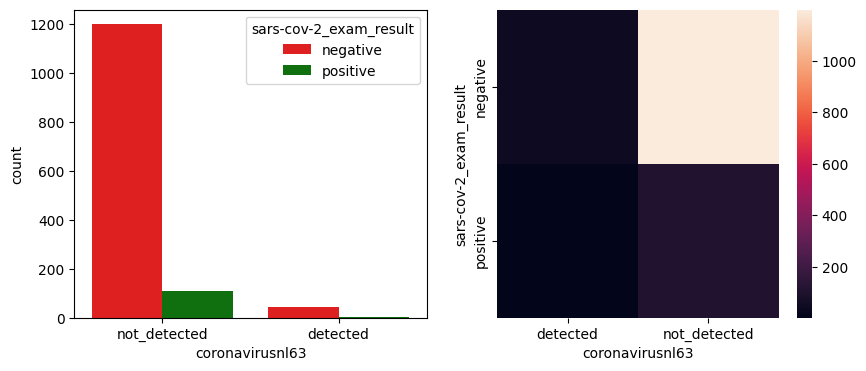

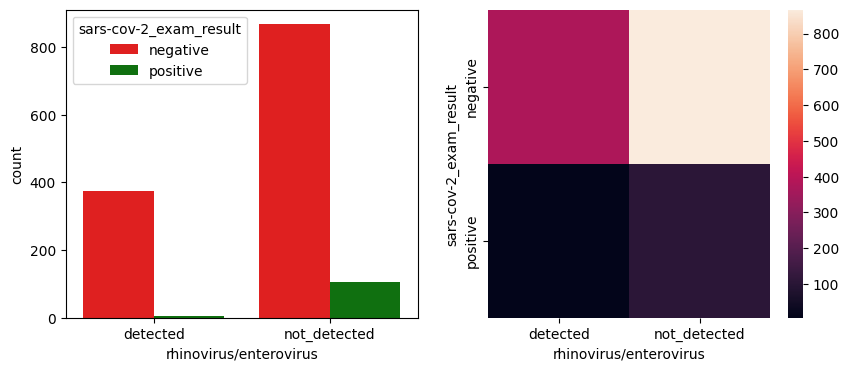

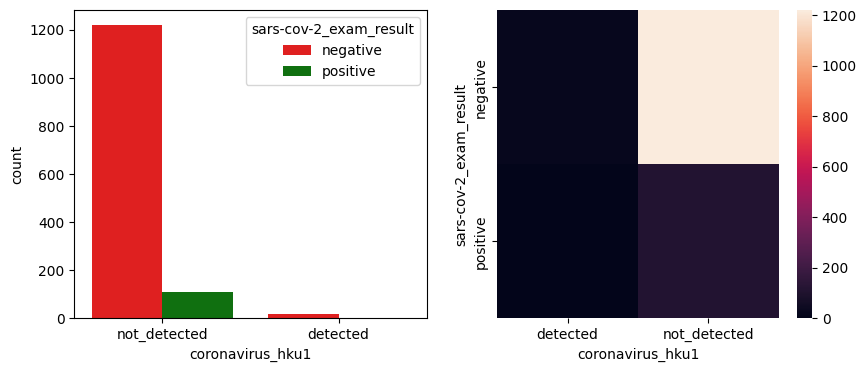

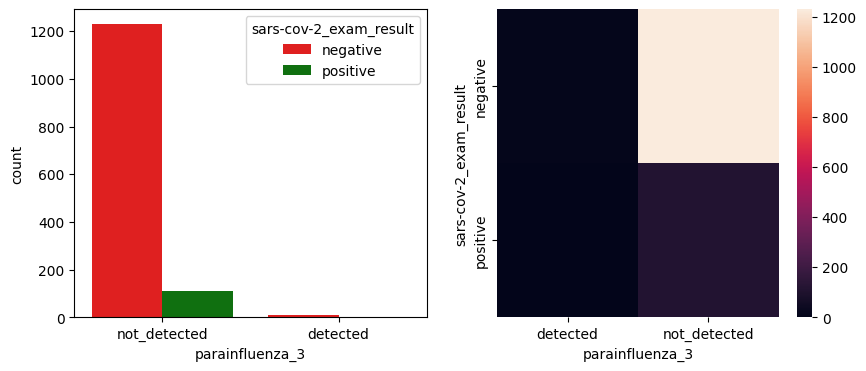

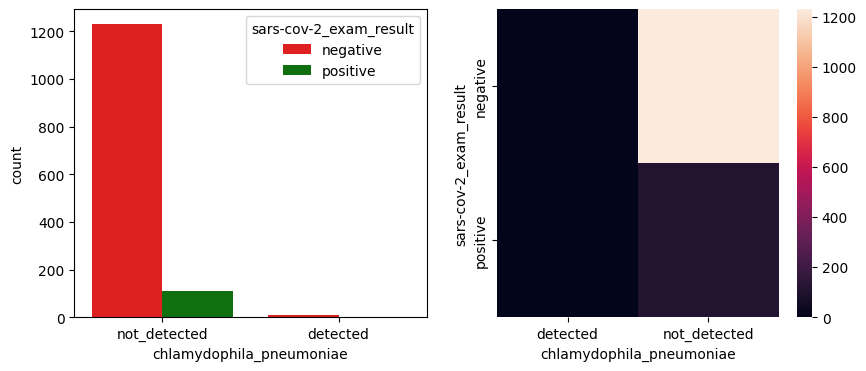

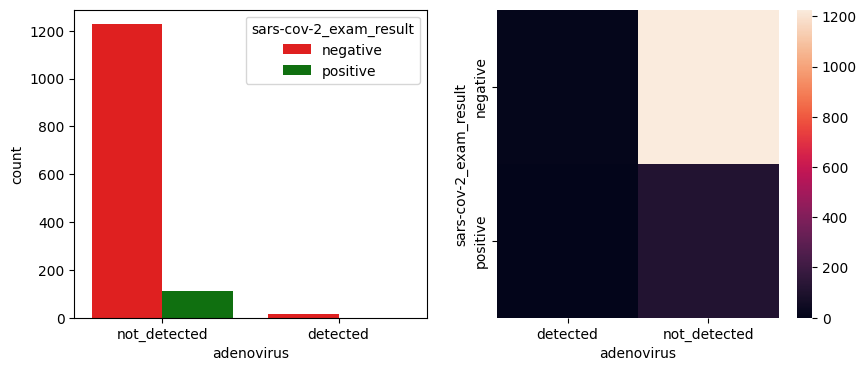

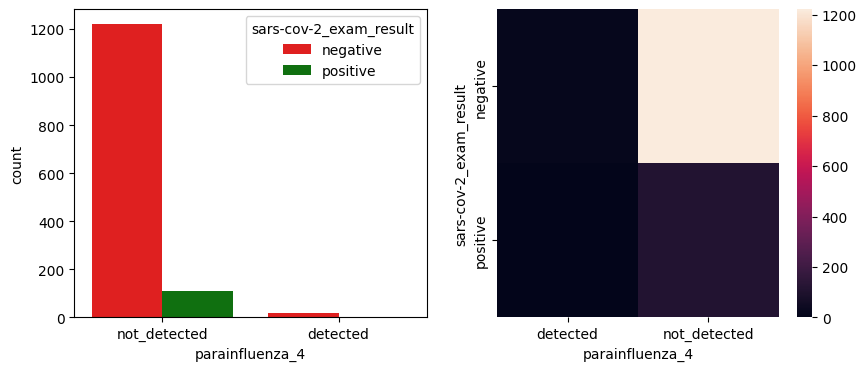

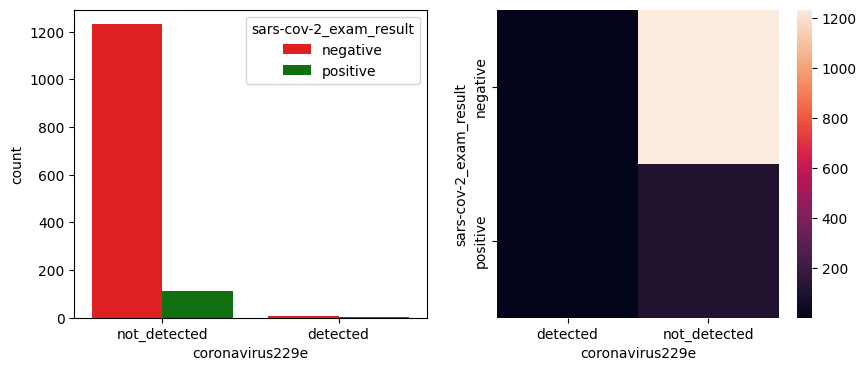

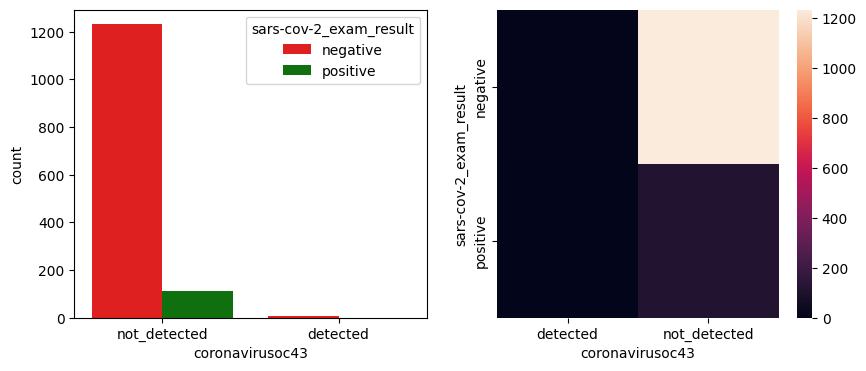

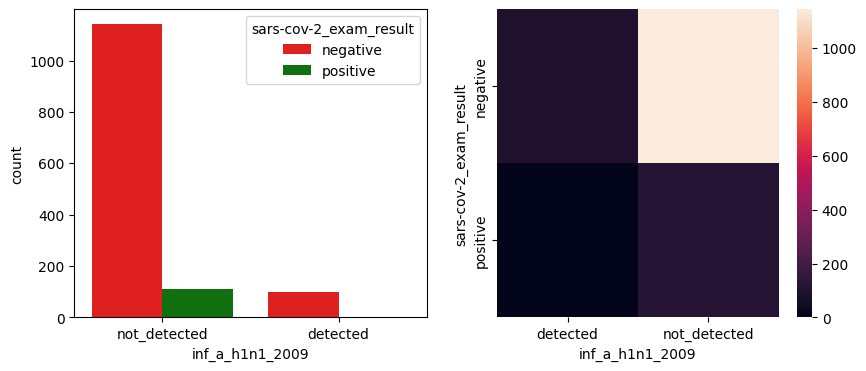

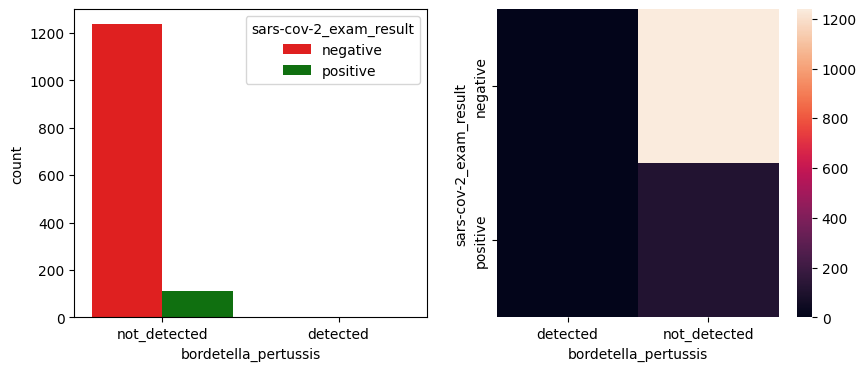

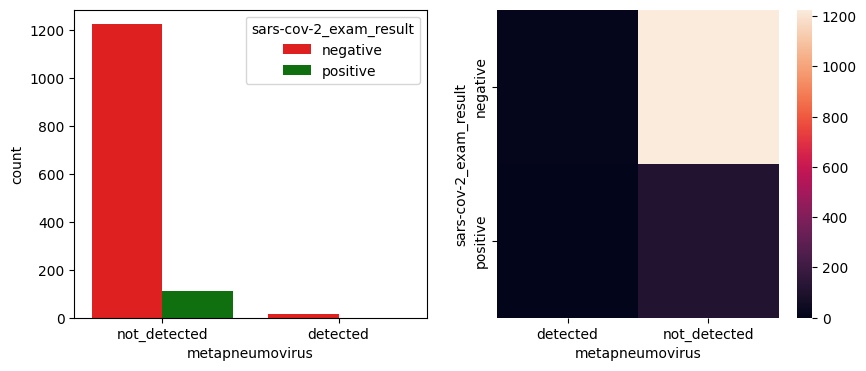

In [22]:
for col in respiratory_pathogens:
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.countplot(data=df, x=col, hue=target, palette=sns.color_palette(['red', 'green']))
    plt.subplot(1, 2, 2)
    sns.heatmap(pd.crosstab(df[target], df[col]))
    plt.show()

* On peut noter que toutes les variables de ce groupe ce comporte de la même manière par rapport à la target : 
Il est très rare qu'une personne atteinte d'un pathogène respiratoire, soit également atteinte du COVID-19. Il existe donc peut être un lien entre ce groupe de features et la target.

2. influenza_tests / target

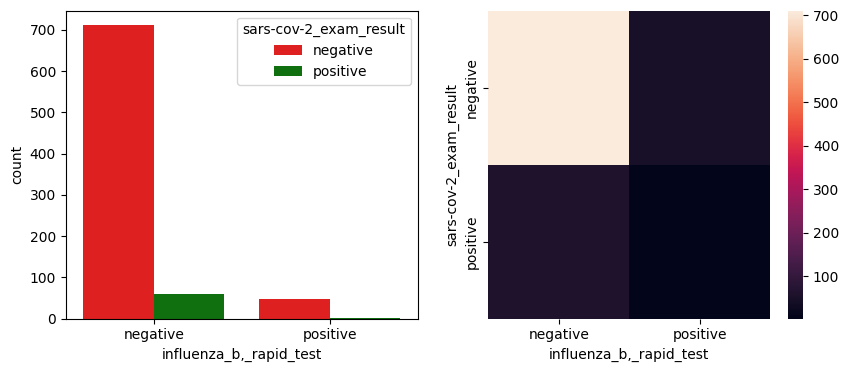

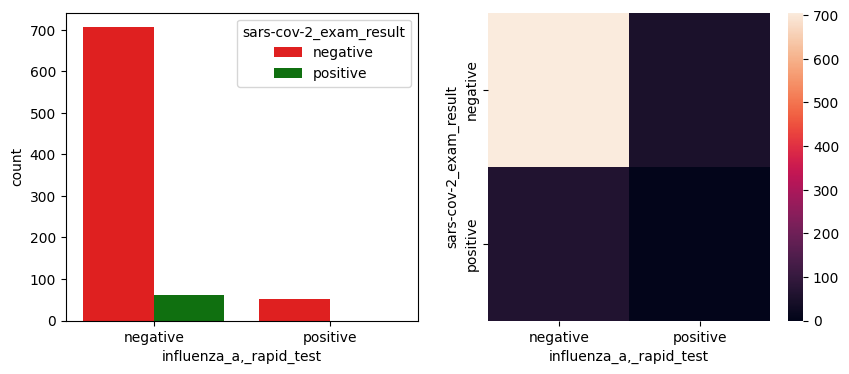

In [23]:
for col in influenza_tests:
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.countplot(data=df, x=col, hue=target, palette=sns.color_palette(['red', 'green']))
    plt.subplot(1, 2, 2)
    sns.heatmap(pd.crosstab(df[target], df[col]))
    plt.show()

* On fait le même constat que précedemment pour ce groupe de variable : Une personne positifs aux tests influenza est rarement atteinte du COVID-19

3. blood_cells / target

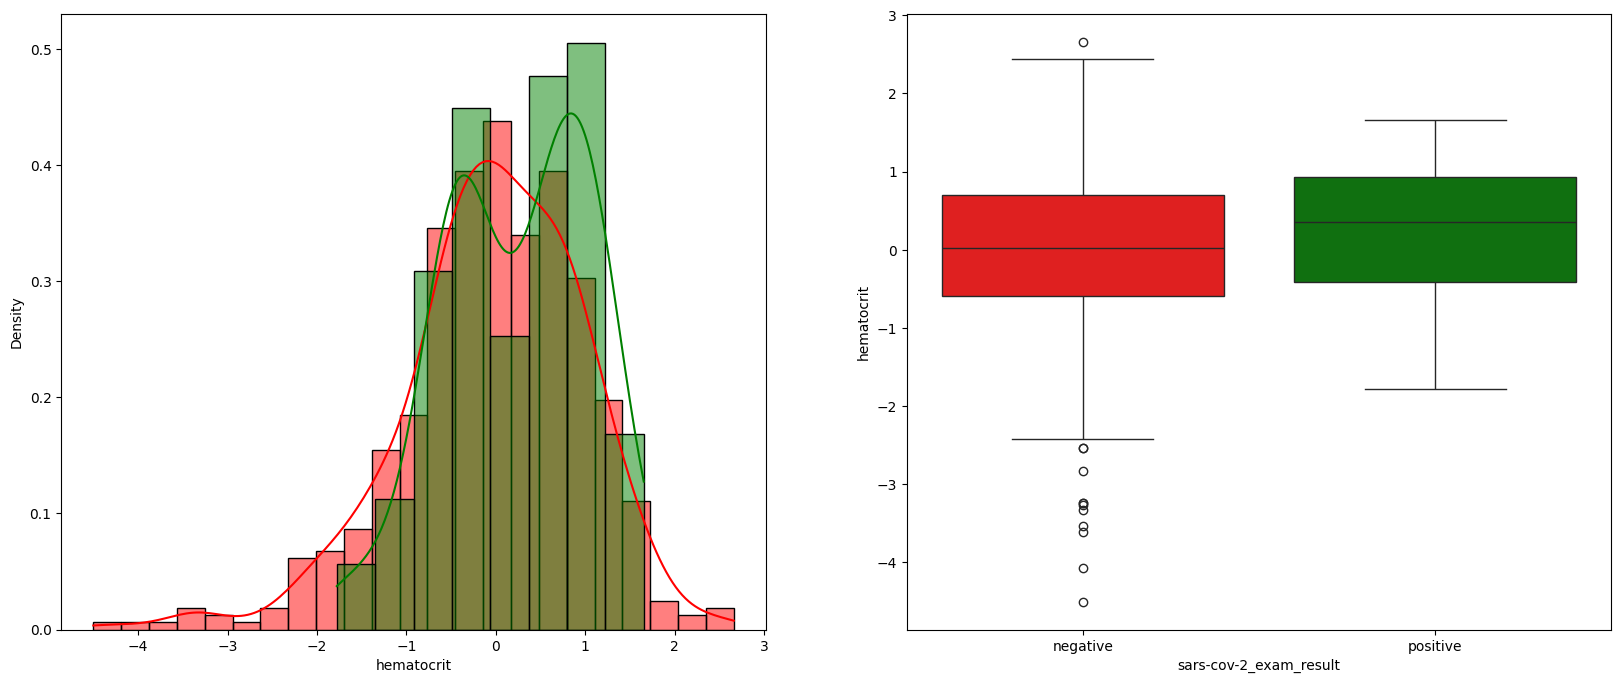

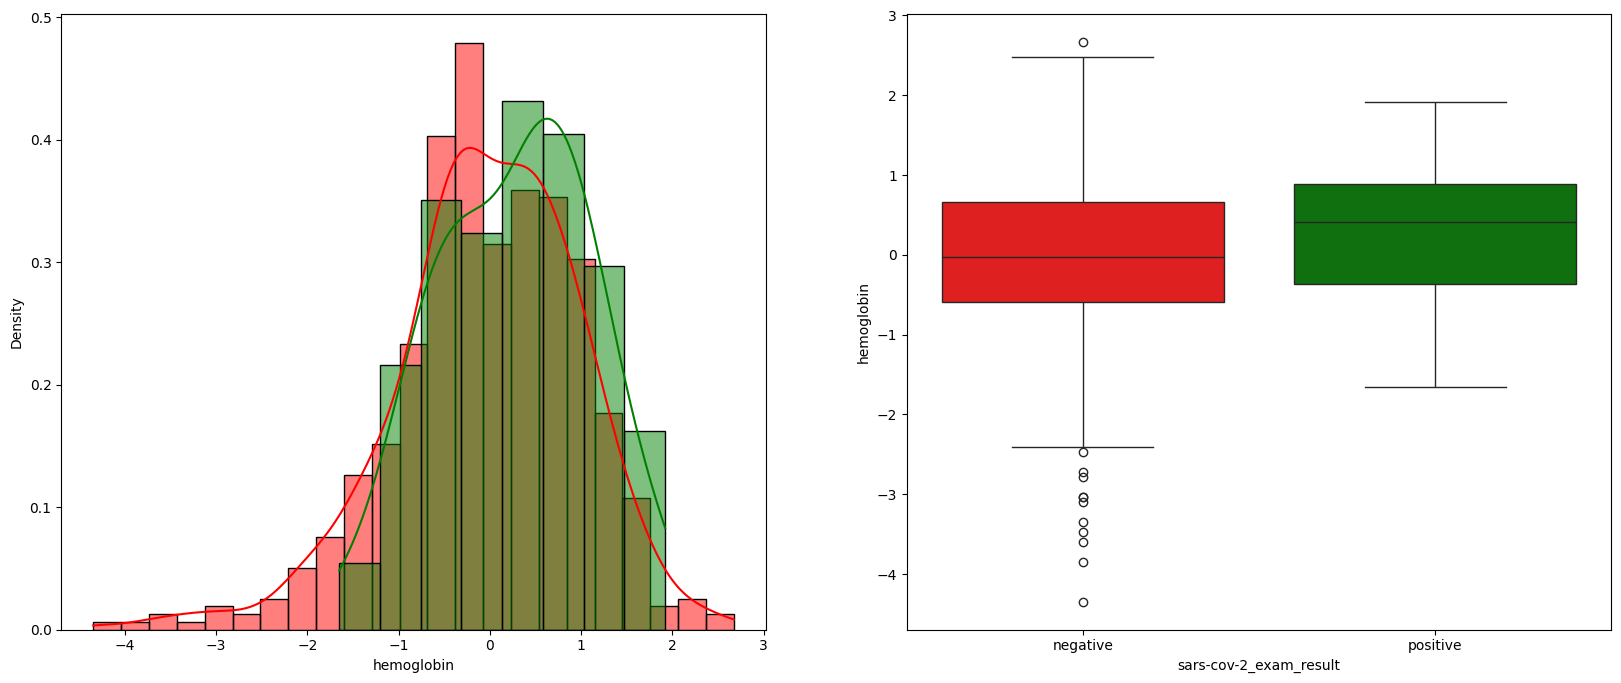

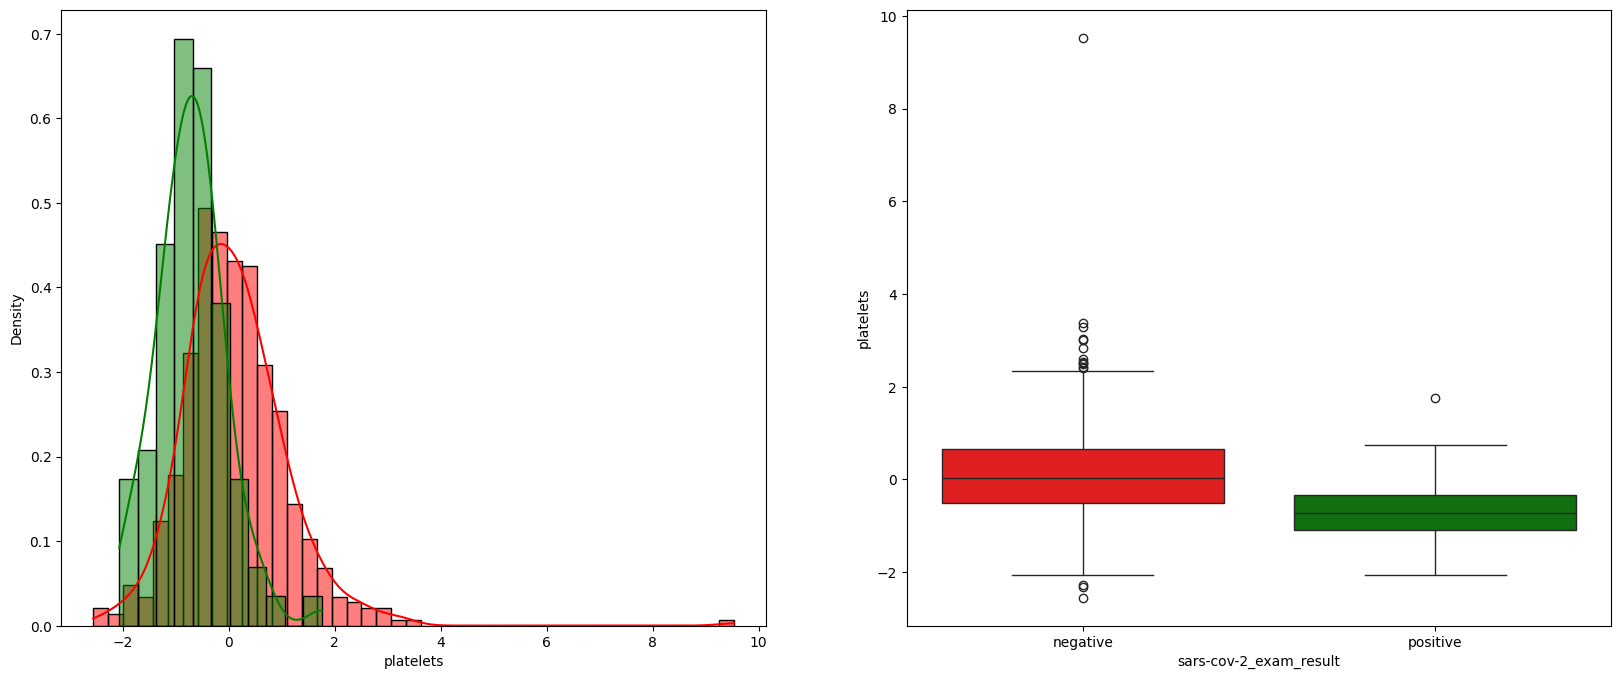

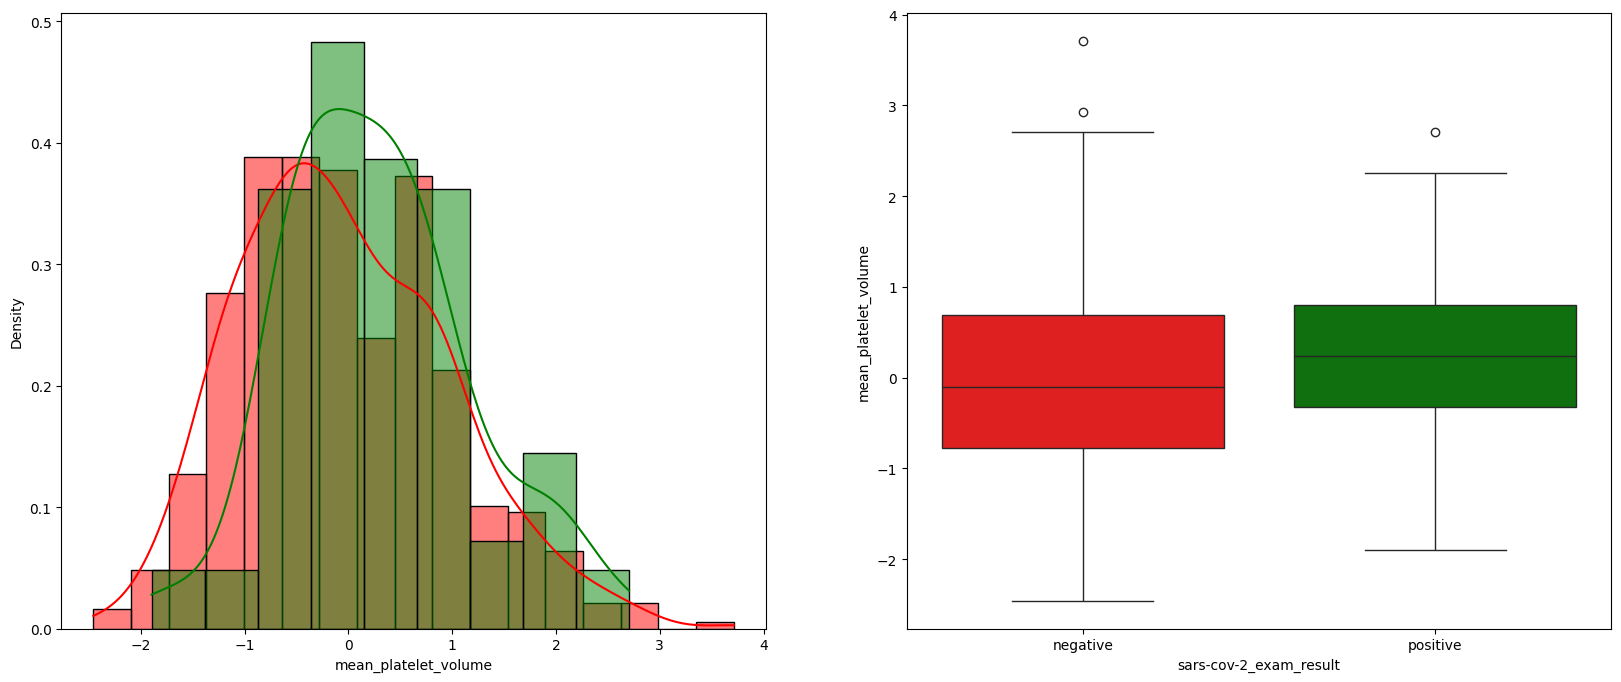

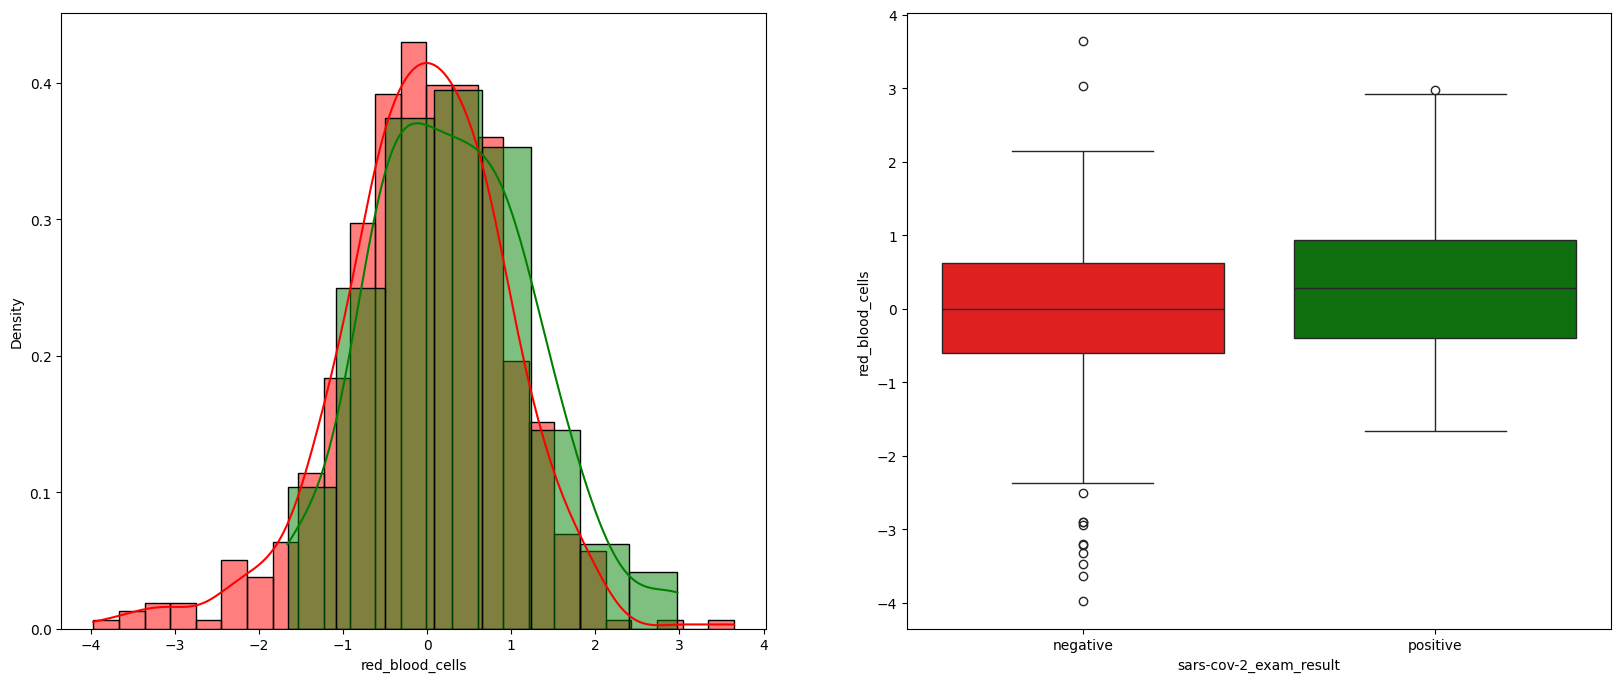

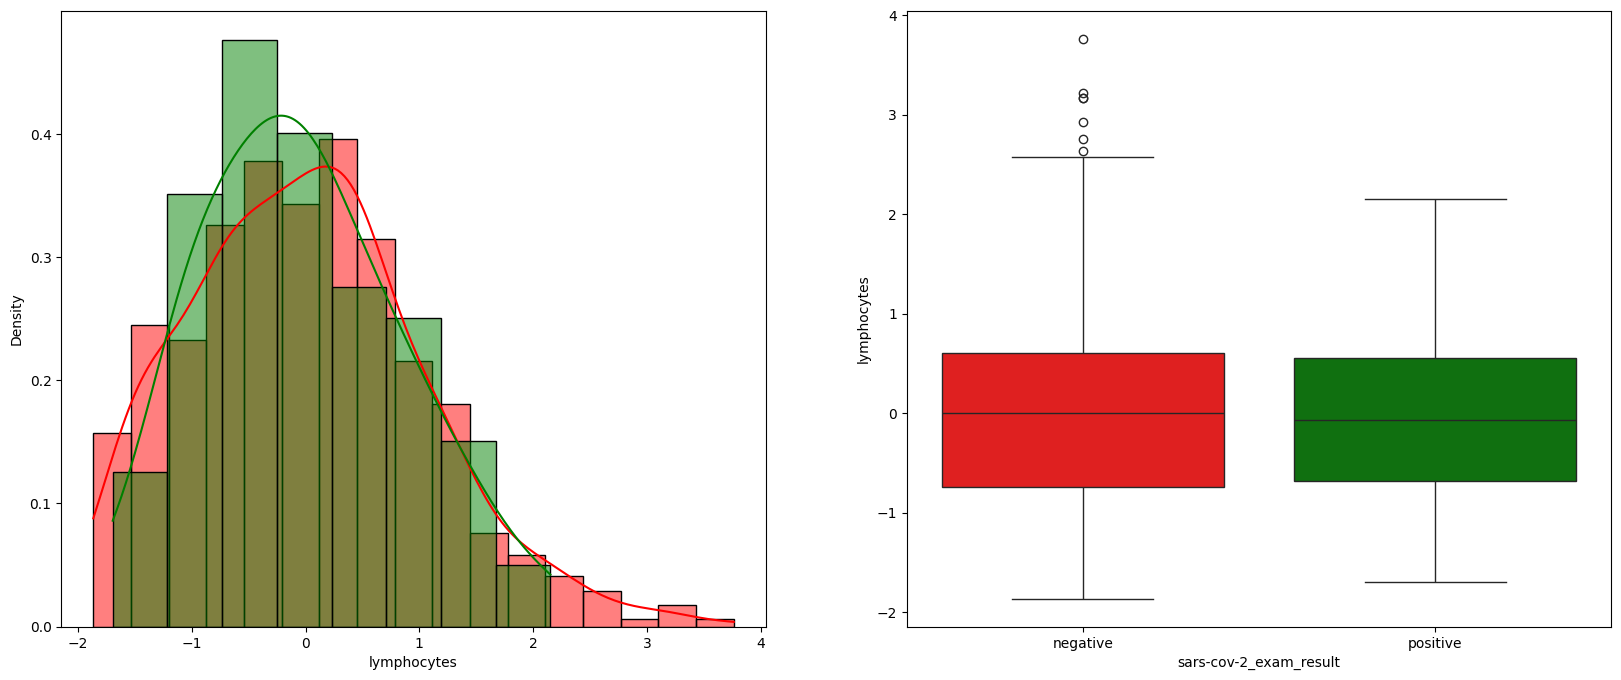

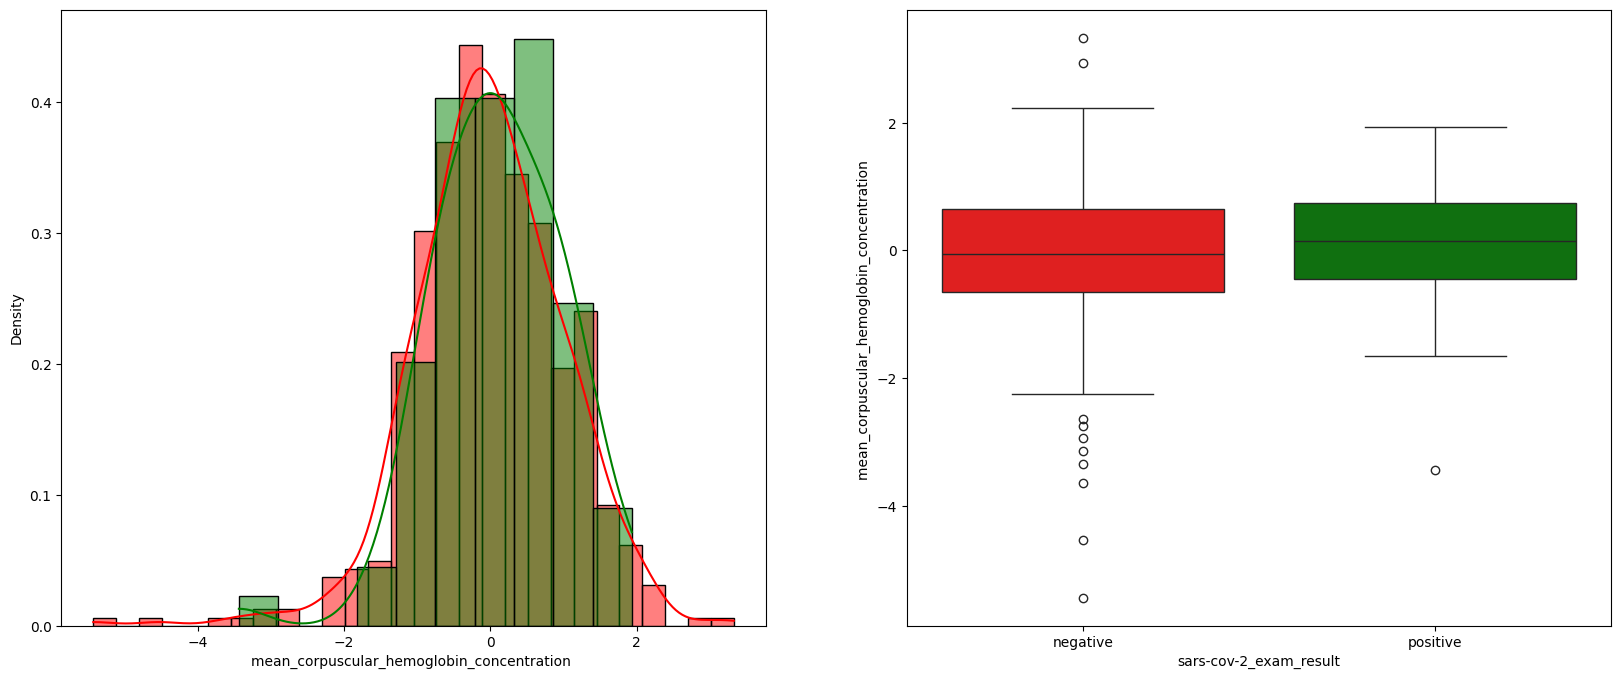

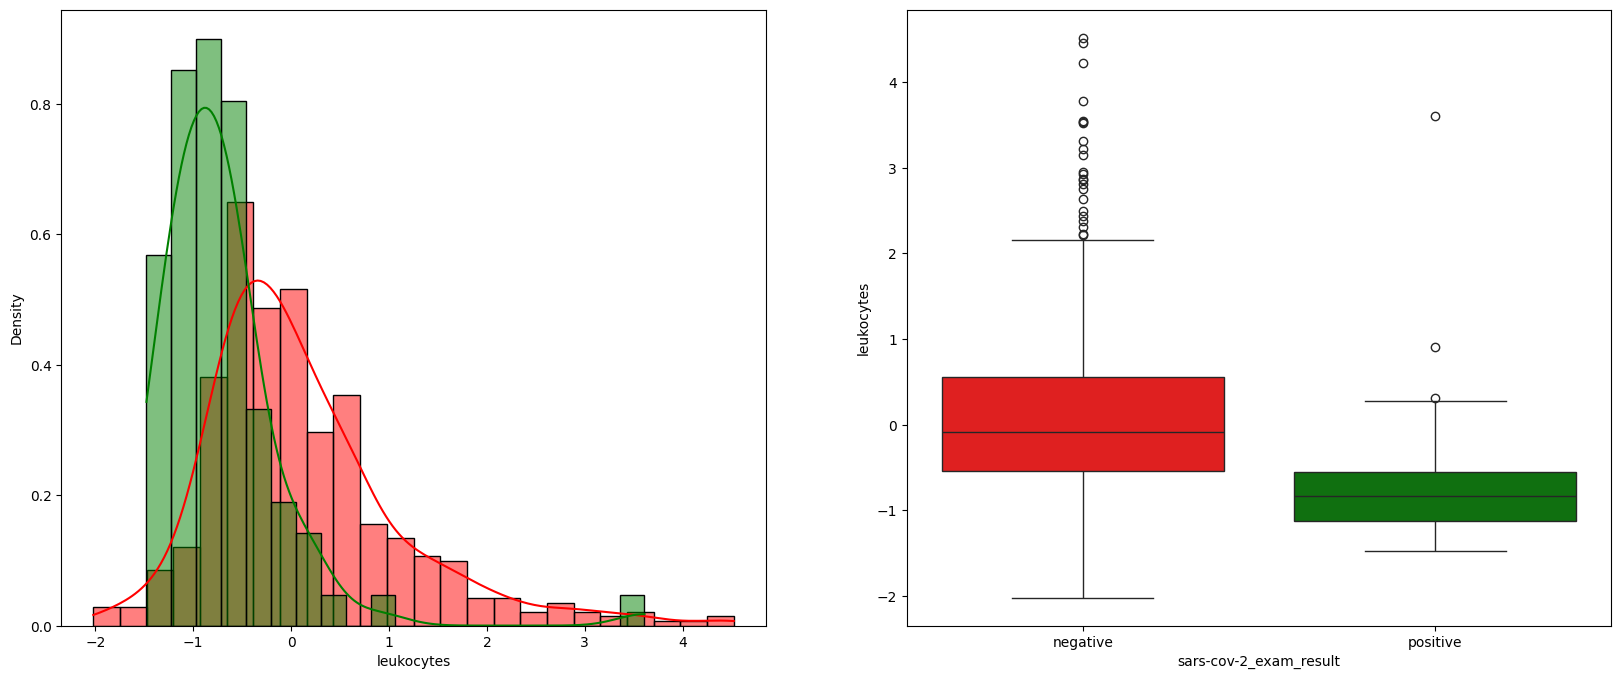

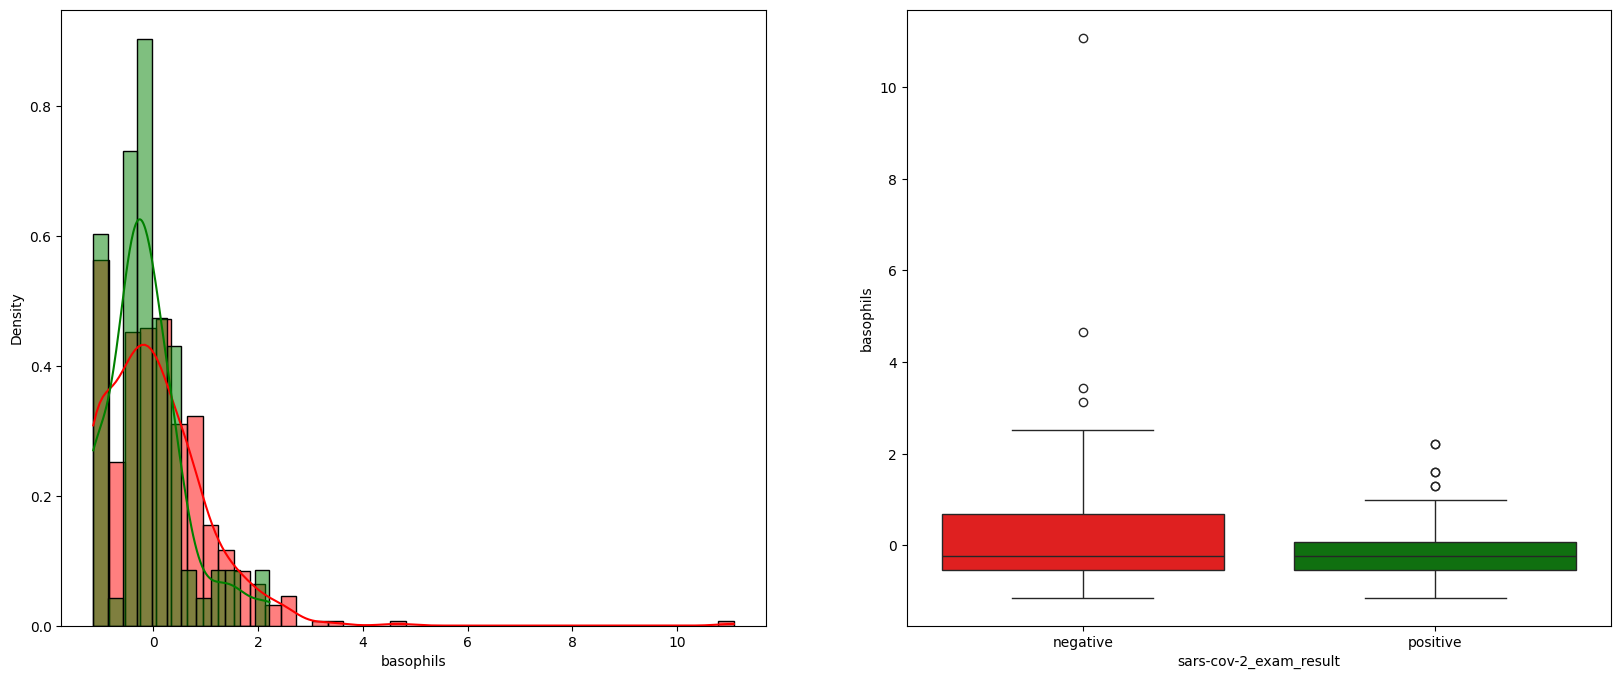

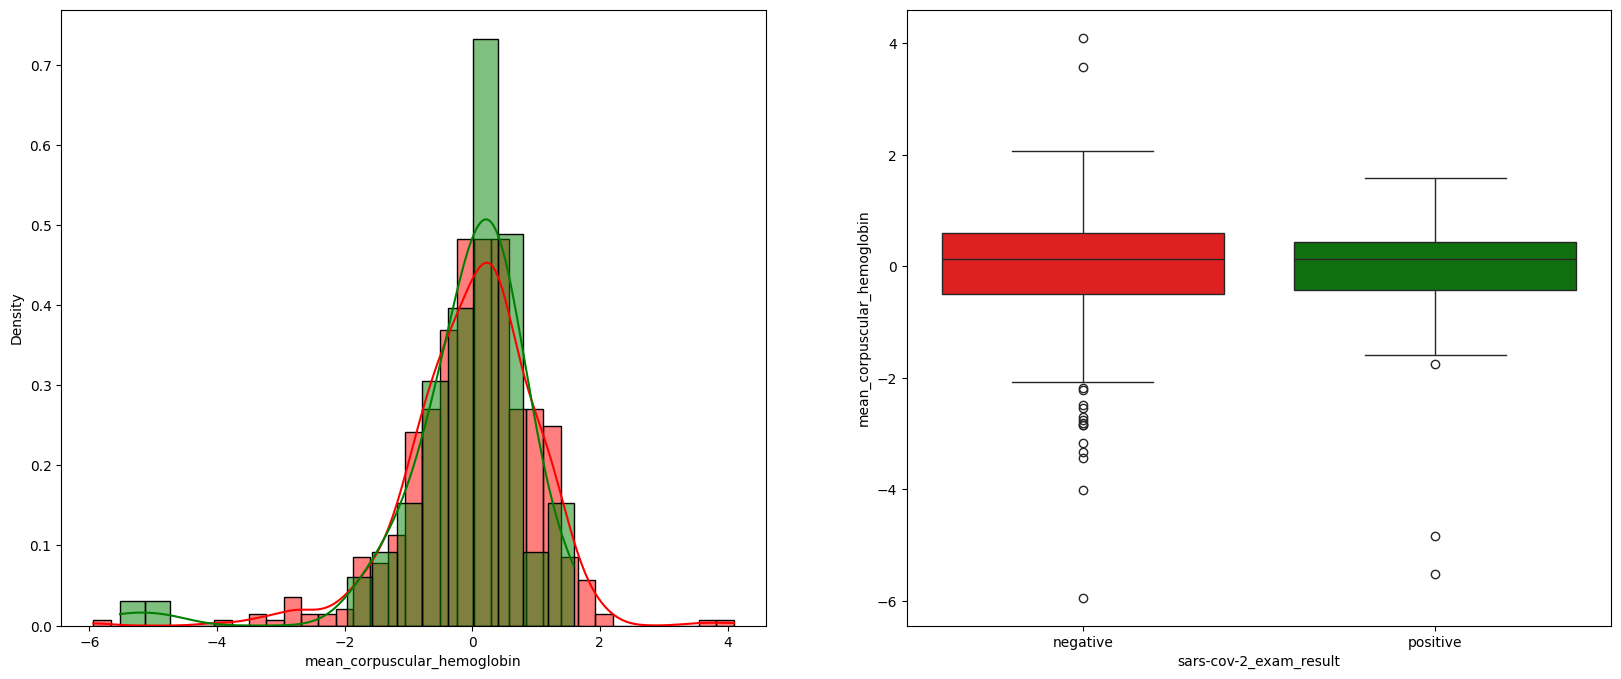

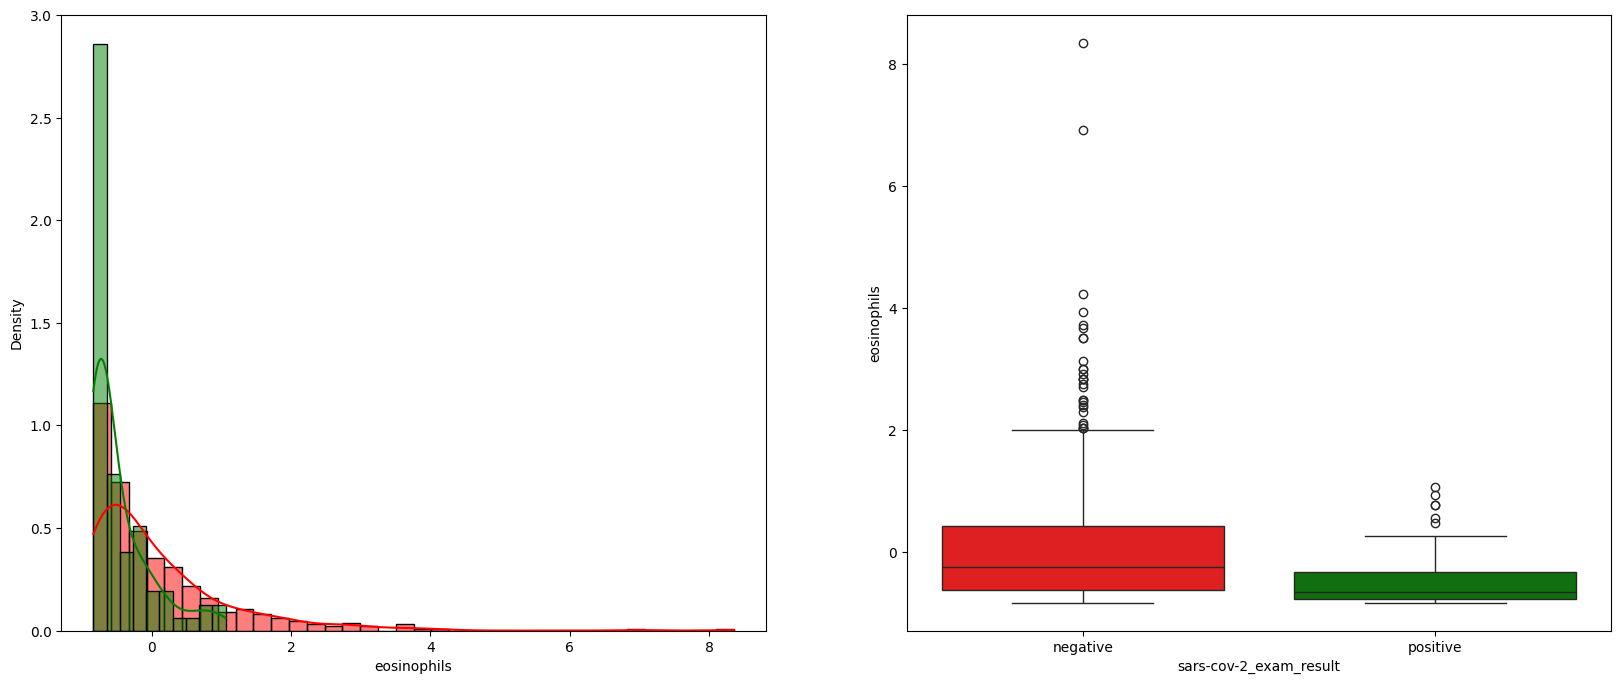

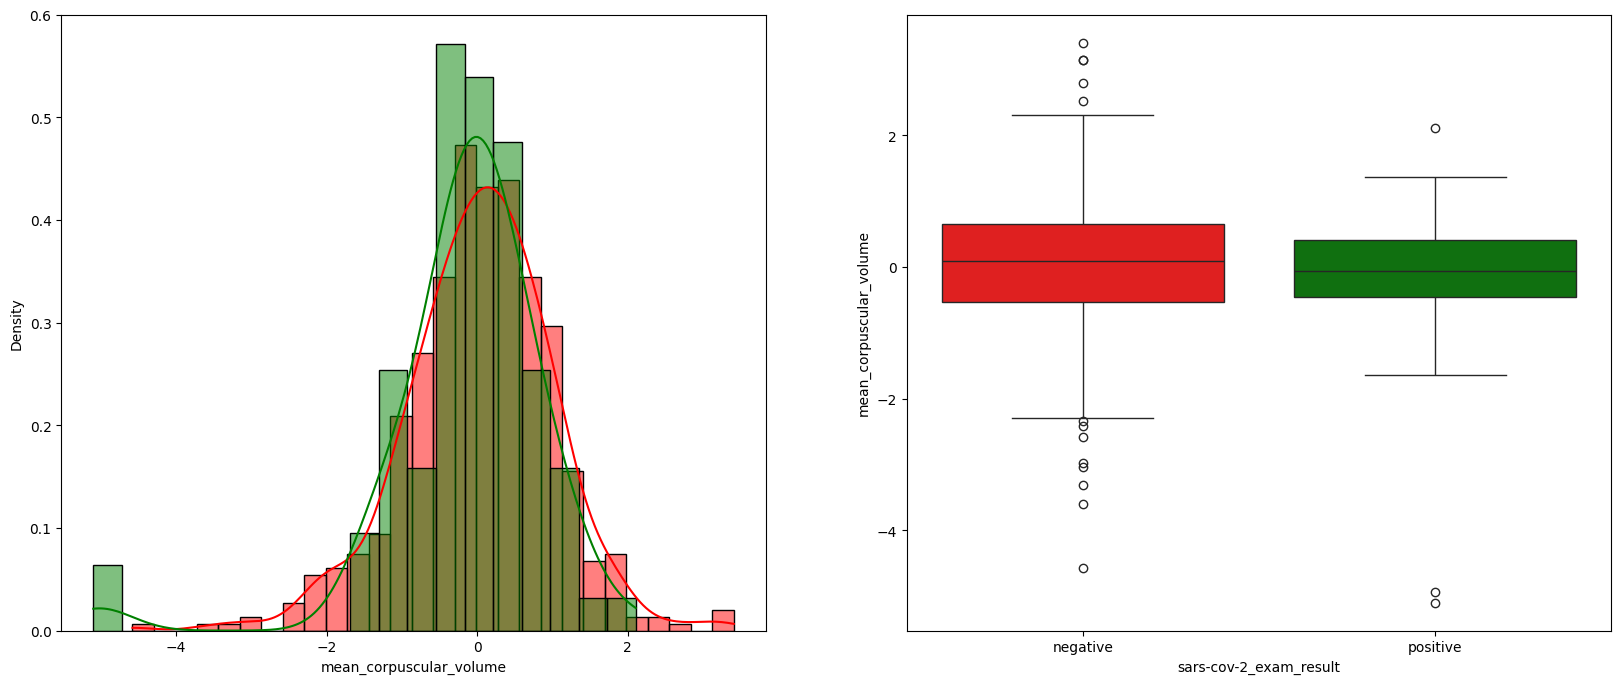

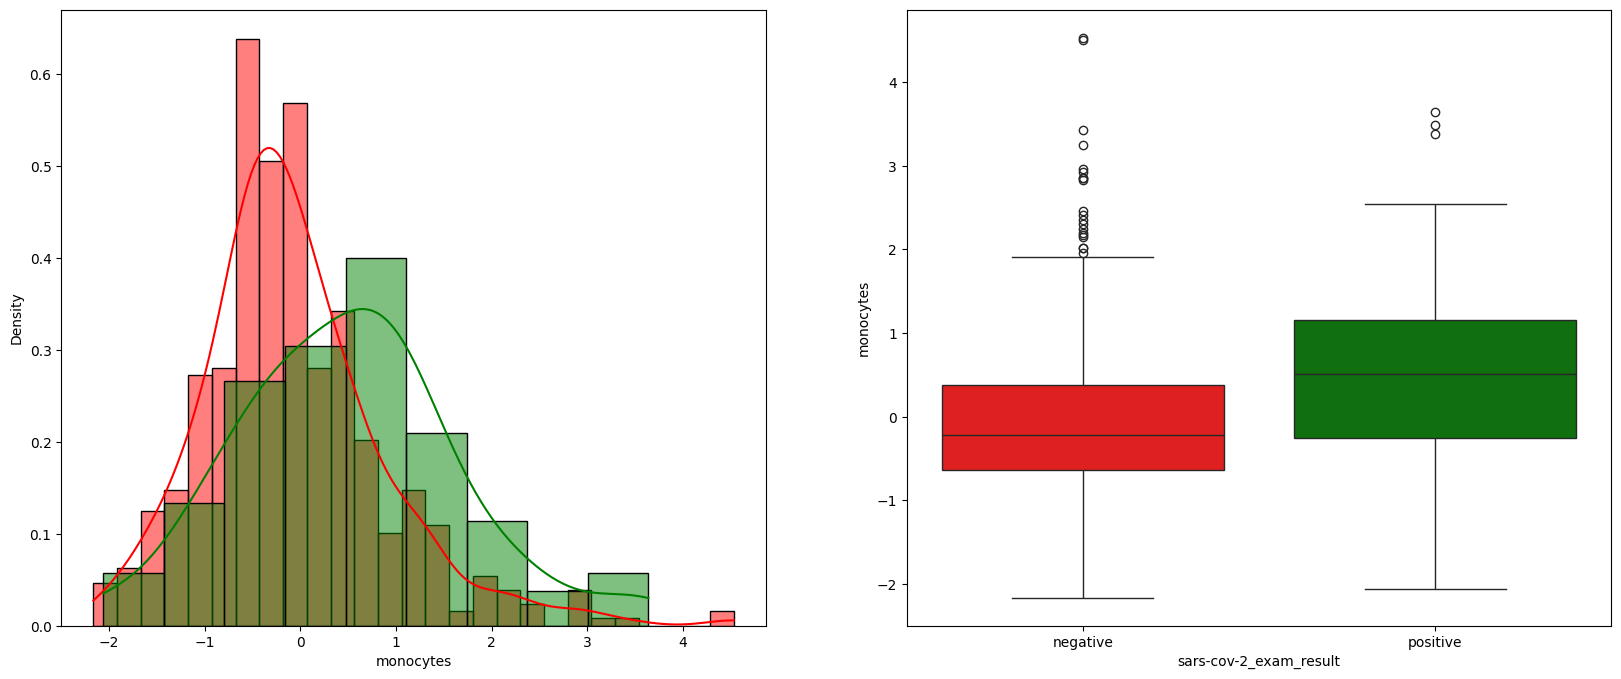

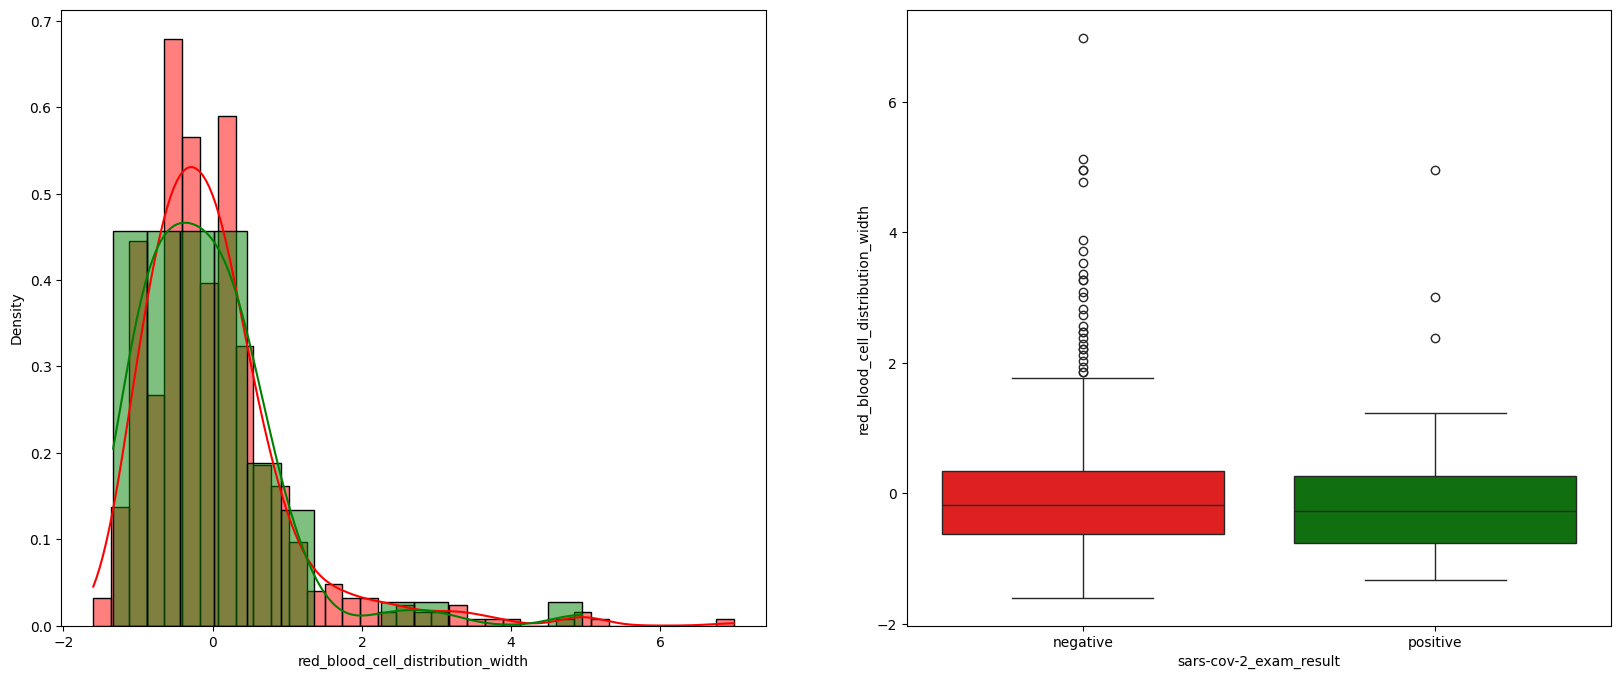

In [90]:
positive_col = df.loc[df[target]=='positive', blood_cells]
negative_col = df.loc[df[target]=='negative', blood_cells]

for col, col_pos, col_neg in zip(blood_cells, positive_col.columns, negative_col.columns):
    plt.figure(figsize=(20, 8))
    plt.subplot(1, 2, 1)
    sns.histplot(data=negative_col, x=col_neg, color='red', kde=True, stat='density')
    sns.histplot(data=positive_col, x=col_pos, color='green', alpha=0.5, kde=True, stat='density')
    plt.subplot(1, 2, 2)
    sns.boxplot(data=df, x=target, y=col, hue=target, palette=sns.color_palette(['red', 'green']))
    plt.show()

On peut retenir ici qu'il semble existe une relation entre la target et les variables `platelets`, `monocytes`, `leukocytes`. En effet : 
* En visualisant les histogrammes : la distribution de ces variables entre les personnes ateintes et celles non-atteintes sont à peu près distinctes l'une de l'autre
* En visualisant les boxplots : On constate que pour ces variables l'IQR des personnes atteintes sont soit au dessus, soit en dessous de celles des personnes non atteintes. Leurs distributions ne se confondent pas comme pour les autres variables.

4. patient_age_quantile / target

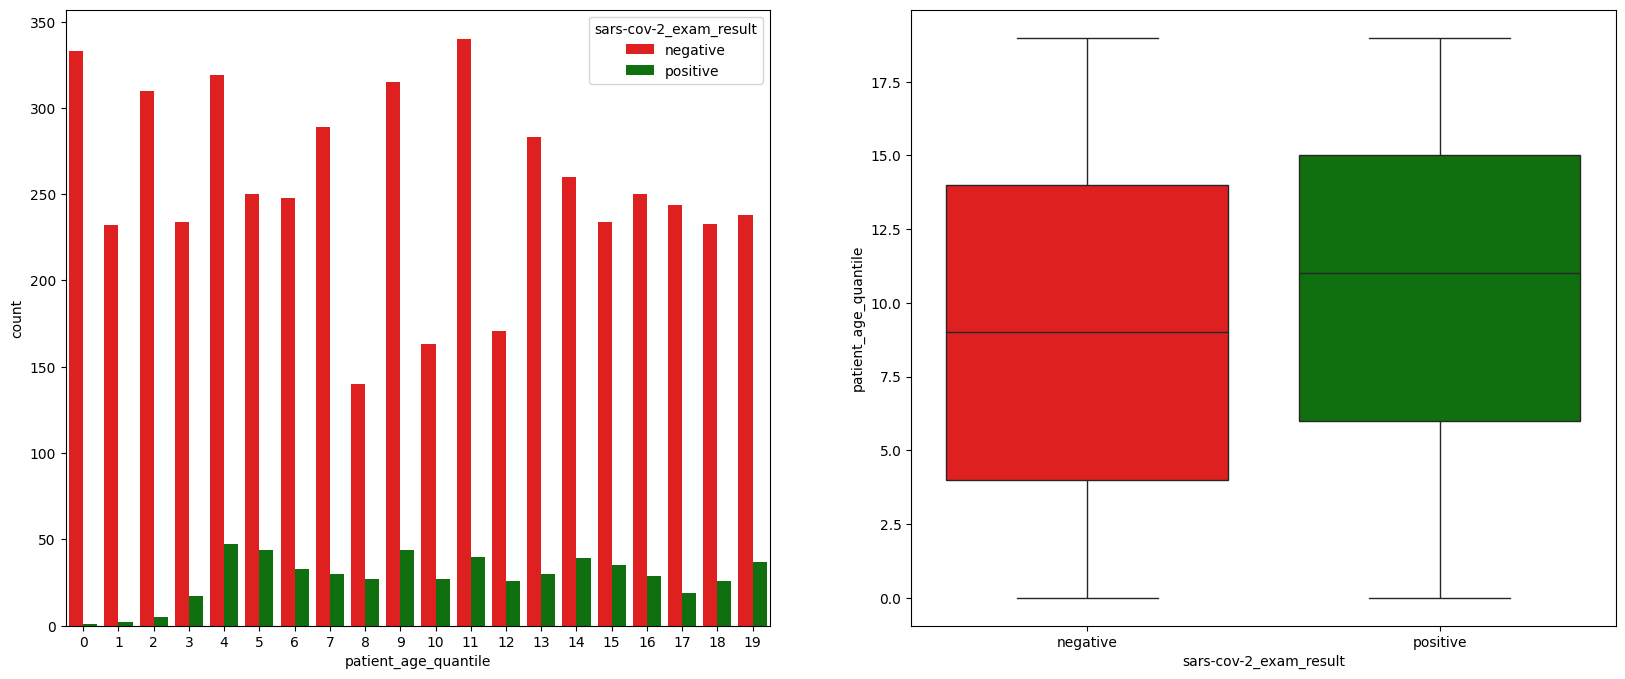

In [97]:
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='patient_age_quantile', hue=target, palette=sns.color_palette(['red', 'green']))
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x=target, y='patient_age_quantile', hue=target, palette=sns.color_palette(['red', 'green']))
plt.show()

D'après l'histogramme on serait tenter de dire que les plus jeunes ont de plus faibles chances d'être postif au COVID-19, cependant on a aucune info tangible sur cette variable, Donc il peut exister un lien comme il peut ne pas en exister. Donc pas de conclusion hâtive à tirer de ce côté.

5. patient_addmited (3 variables) / target

In [ ]:
patient_addmited_col = [
    'patient_addmited_to_regular_ward', 
    'patient_addmited_to_semi-intensive_unit', 
    'patient_addmited_to_intensive_care_unit'
]

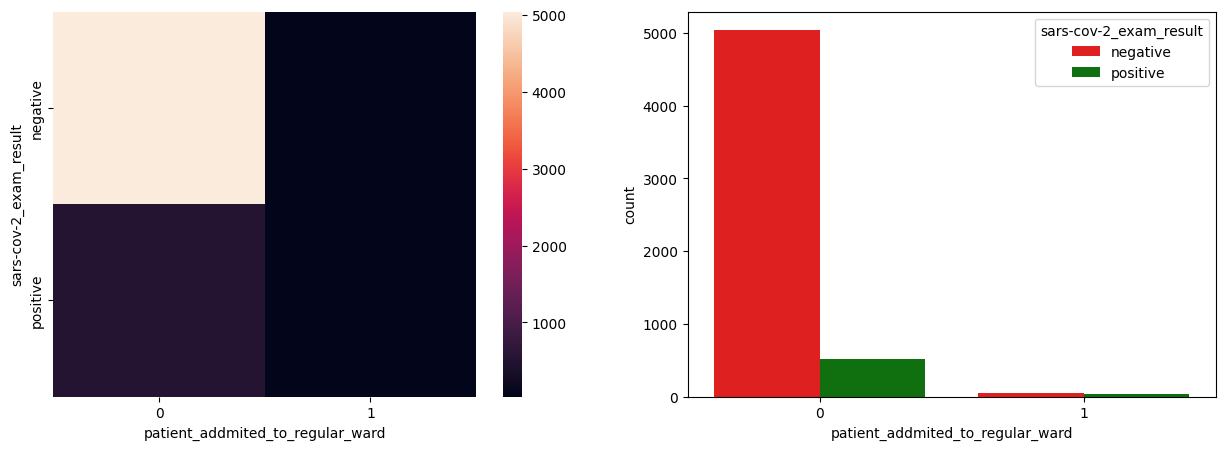

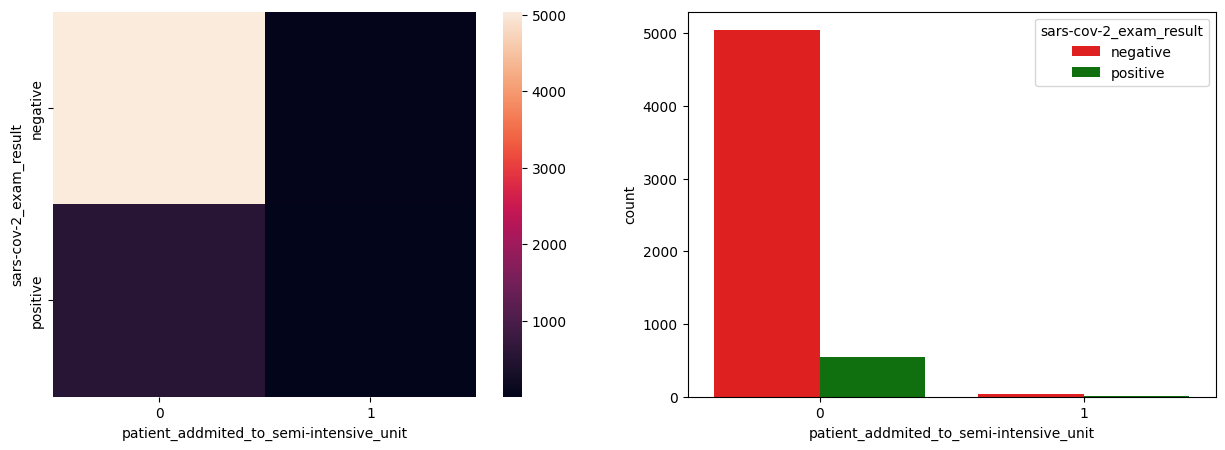

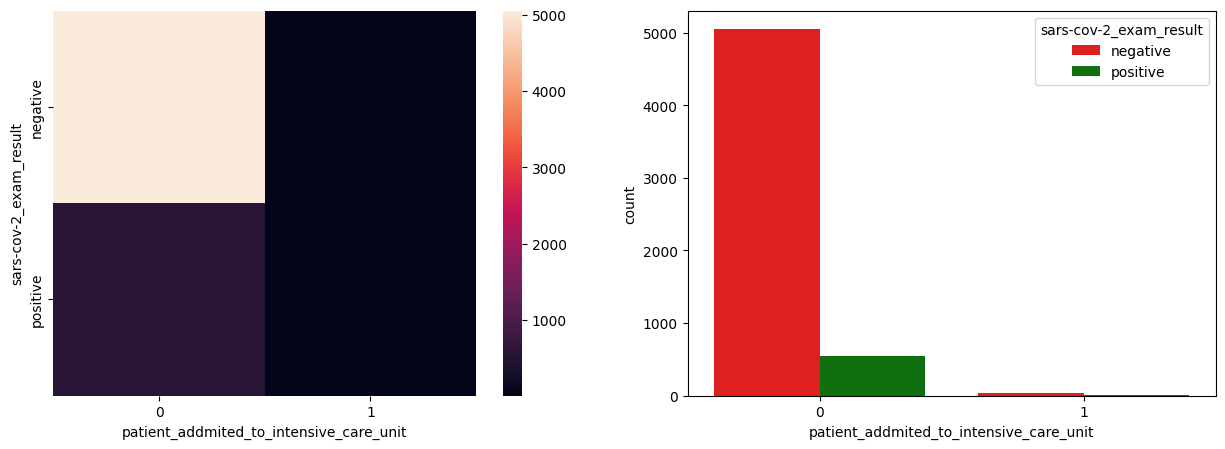

In [116]:
for col in patient_addmited_col:
    plt.figure(figsize=(15, 5))
    cross_table = pd.crosstab(df[target], df[col])
    plt.subplot(1, 2, 1)
    sns.heatmap(cross_table)    
    plt.subplot(1, 2, 2)
    sns.countplot(data=df, x=col, hue=target, palette=sns.color_palette(['red', 'green']))
    plt.show()

On peut remarquer ici que quelques soit l'intensité des soins, le nombre de patients atteints et non-atteints reste à peu près le même. Ces variables n'ont pas l'air d'influencer la target.

- ### Relations entre Features et Features


On le fera en plusieurs étapes :

<label><input type="checkbox" checked> Quanti / Quanti</label><br>
<label><input type="checkbox" checked> Quali / Quali</label><br>
<label><input type="checkbox" checked> Quanti / Quali</label><br>

1. Quanti / Quanti

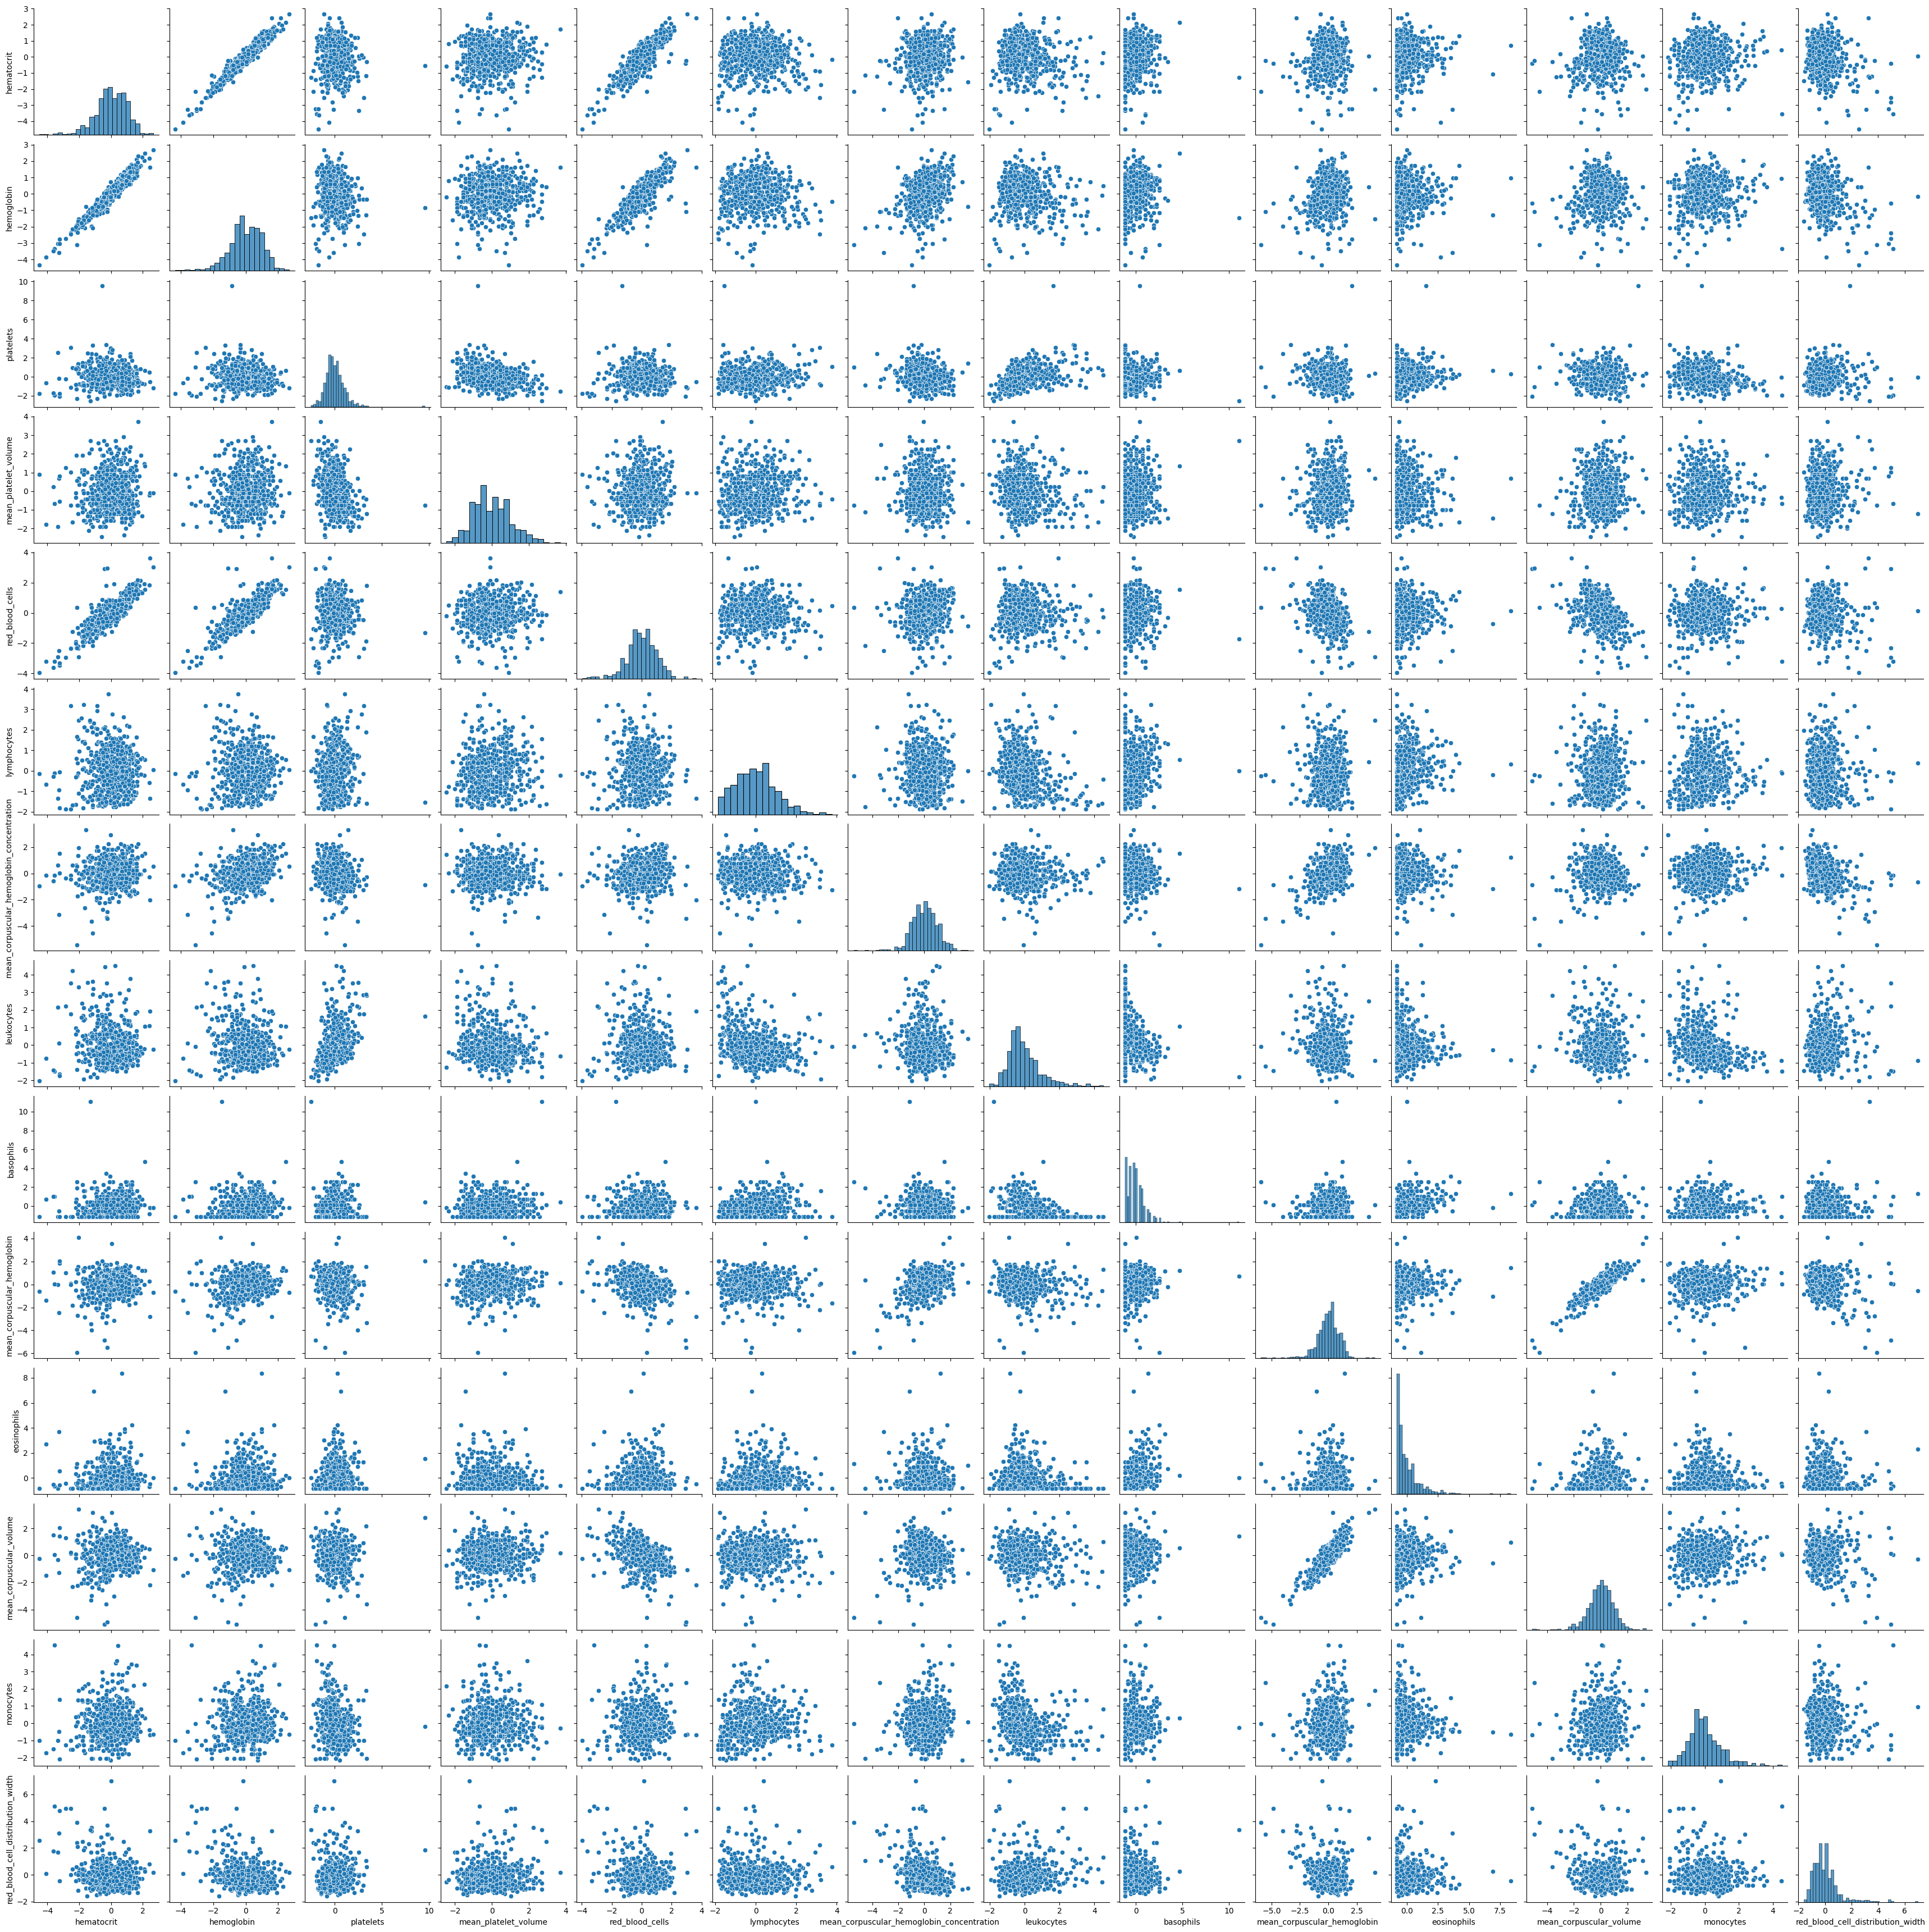

In [118]:
sns.pairplot(data=df.select_dtypes(include='float'))
plt.show()

On peut voir clairement des relations linéaires entre :
* hematocrit et hemoglobin et red_blood_cells
* mean_corpuscular_volume et mean_corpuscular_hemoglobin

In [136]:
from plotly import express as exp

exp.scatter_3d(data_frame=df, x='hematocrit', y='hemoglobin', z='red_blood_cells')

/tmp/ipykernel_143506/3746436994.py:9: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



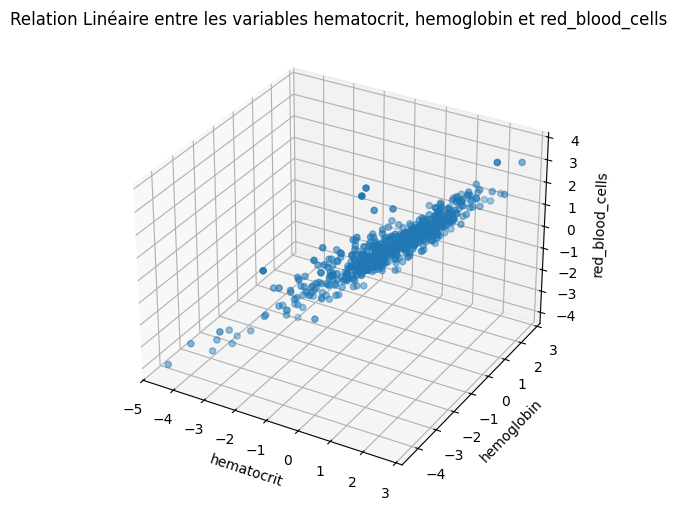

In [137]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(projection='3d')
ax.scatter(df['hematocrit'], df['hemoglobin'], df['red_blood_cells'])

ax.set_title("Relation Linéaire entre les variables hematocrit, hemoglobin et red_blood_cells")
ax.set_xlabel('hematocrit')
ax.set_ylabel('hemoglobin')
ax.set_zlabel('red_blood_cells')
fig.show()

2. Quali / Quali